# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('74ef0466.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-05-30T01:31:11.843254Z   
1  2020-05-30T01:31:11.849351Z   
2  2020-05-30T01:31:11.855370Z   
3  2020-05-30T01:31:11.861382Z   
4  2020-05-30T01:31:11.867410Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 13036, 'deaths': 235, 'recovered...   
1  {'confirmed': 1076, 'deaths': 33, 'recovered': 0}   
2  {'confirmed': 8997, 'deaths': 630, 'recovered'...   
3   {'confirmed': 763, 'deaths': 51, 'recovered': 0}   
4     {'confirmed': 74, 'deaths': 4, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 13036, 'timeline': {'...  
1  {'confirmed': {'latest': 1076, 'timeline': {'2...  
2  {'confirmed': {'latest': 8997, 'timeline': {'2...  
3  {'confirmed': {'latest': 763, 'timeline': {'20...  
4  {'confirmed': {'latest': 74, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
123      11206     267       NaN                     0.142985   
124      11225     269       NaN                     0.169552   
125      11265     269       NaN                     0.356347   
126      11344     269       NaN                     0.701287   
127      11402     269       NaN                     0.511283   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
123                                         492.102324                 
124                                         583.537140                 
125                                        1226.419822                 
126                                        2413.578423                 
127                                        1759.654057                 

     deaths_percentage_change  \
123                  0.375940   
124                  0.749064   
125                       NaN   
126                       NaN   
127                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
123                                        1293.849859           
124                                        2578.007959           
125                                                NaN           
126                                                NaN           
127                                                NaN           

     confirmed_new_cases  deaths_new_cases  
123                 16.0               1.0  
124                 19.0               2.0  
125                 40.0               NaN  
126                 79.0               NaN  
127                 58.0               NaN

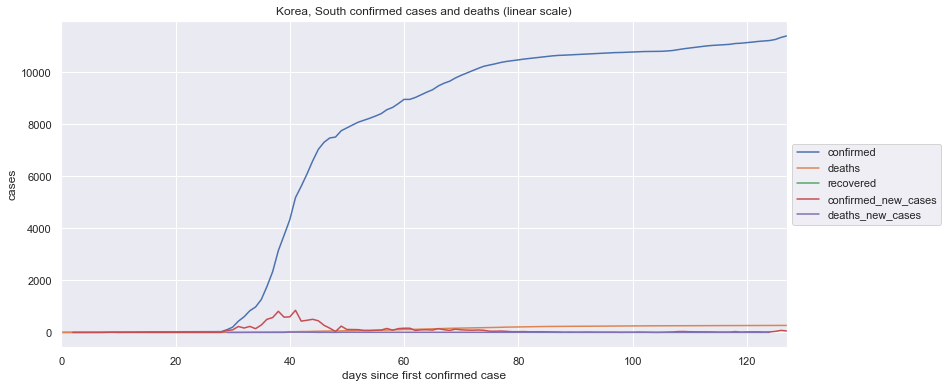

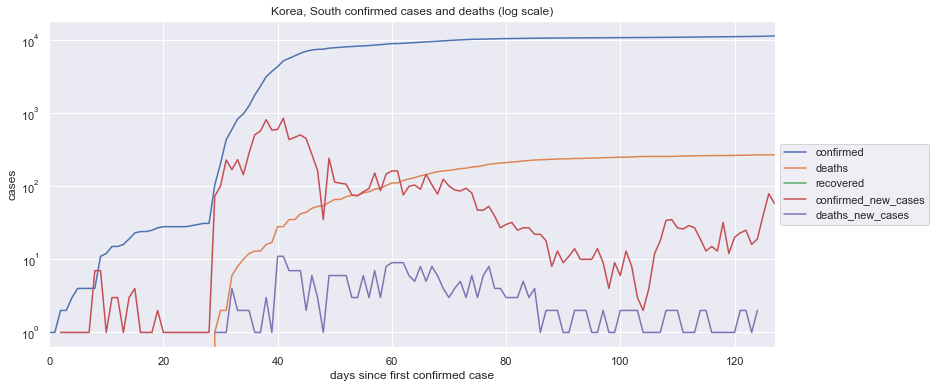

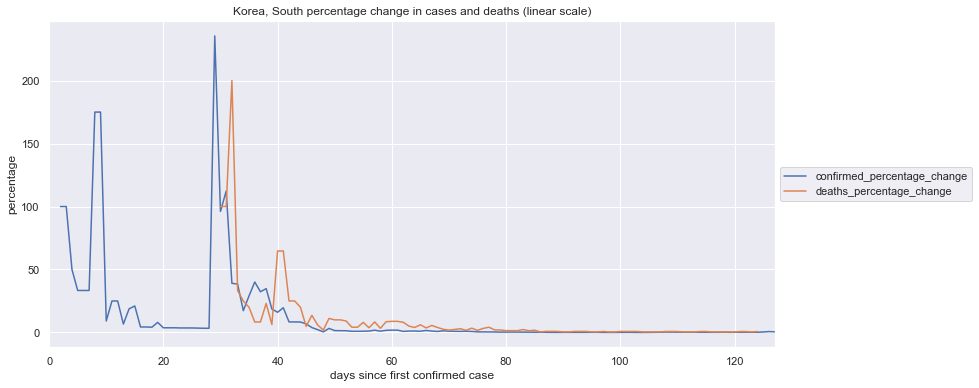

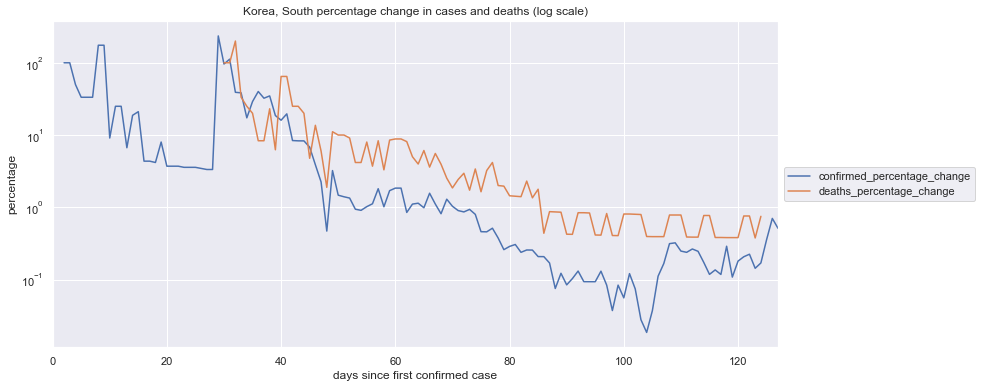

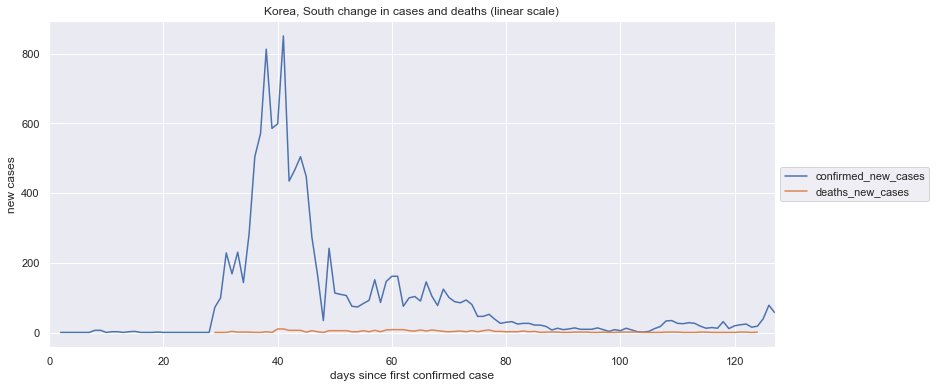

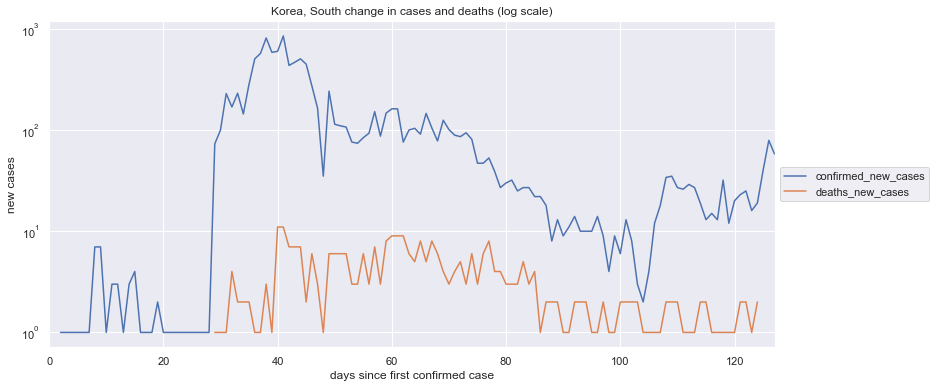

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
110      57092    9280       NaN                     0.496391   
111      57342    9312       NaN                     0.437890   
112      57455    9334       NaN                     0.197063   
113      57592    9364       NaN                     0.238447   
114      57849    9388       NaN                     0.446243   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
110                                        5034.489650                 
111                                        4441.154532                 
112                                        1998.649966                 
113                                        2418.376263                 
114                                        4525.870218                 

     deaths_percentage_change  \
110                  0.465519   
111                  0.344828   
112                  0.236254   
113                  0.321406   
114                  0.256301   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
110                                        4721.376622           
111                                        3497.301994           
112                                        2396.132594           
113                                        3259.752233           
114                                        2599.447018           

     confirmed_new_cases  deaths_new_cases  
110                282.0              43.0  
111                250.0              32.0  
112                113.0              22.0  
113                137.0              30.0  
114                257.0              24.0

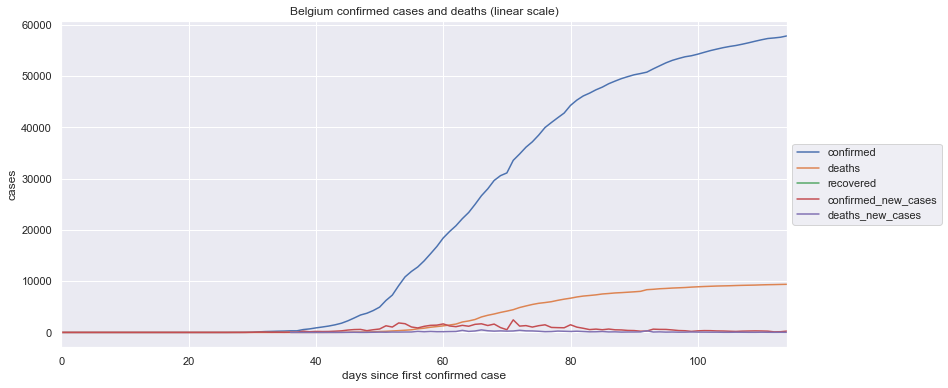

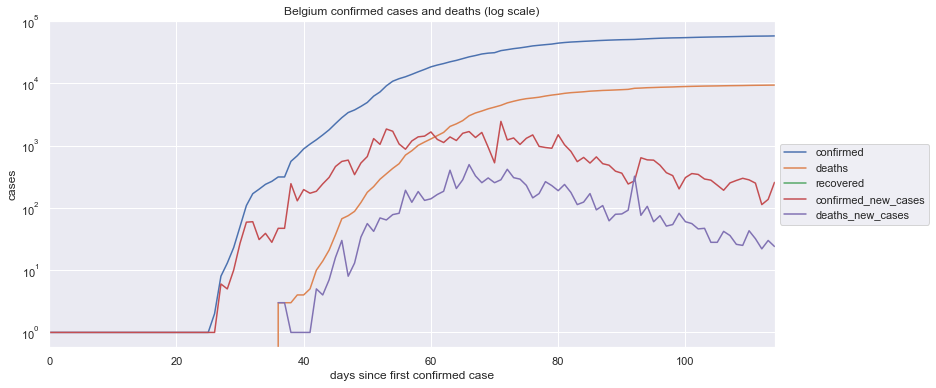

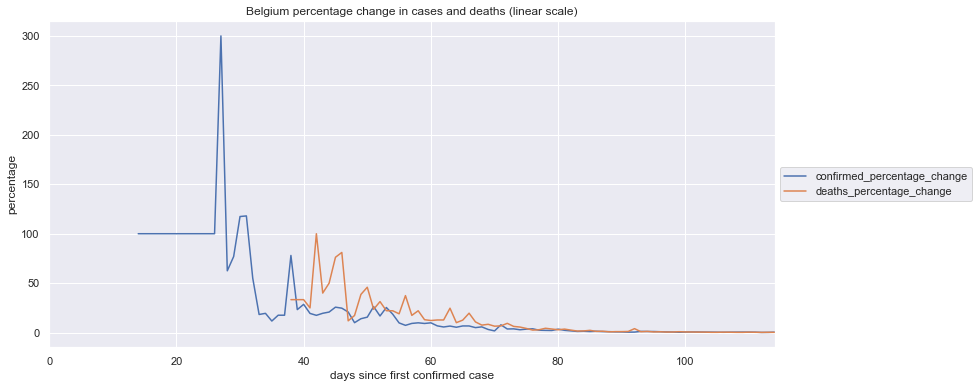

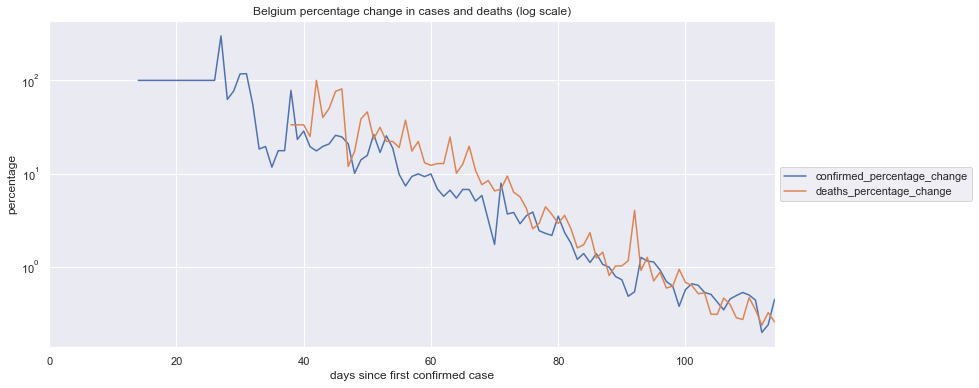

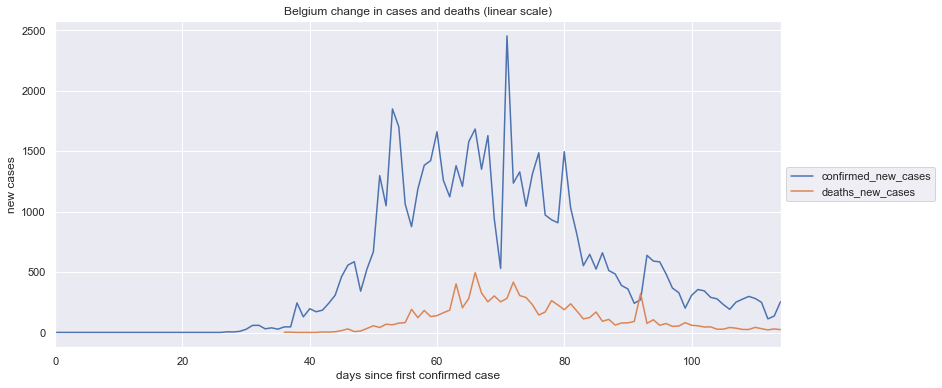

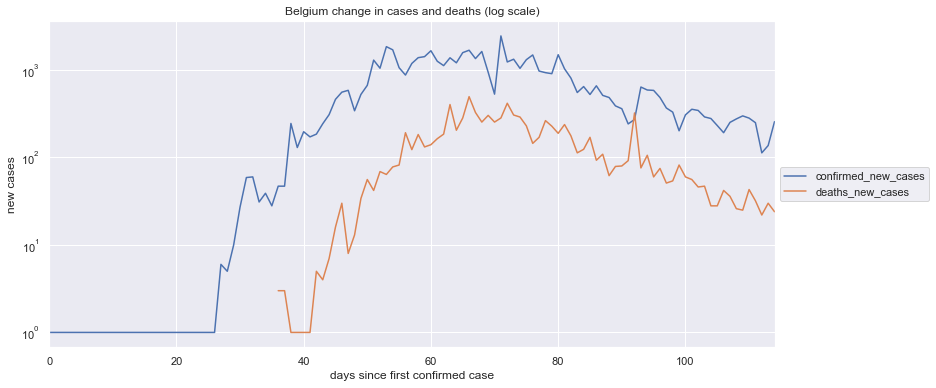

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
89      30736    1906       NaN                     0.035801   
90      30746    1913       NaN                     0.032535   
91      30761    1915       NaN                     0.048787   
92      30776    1917       NaN                     0.048763   
93      30796    1919       NaN                     0.064986   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
89                                         248.155614                 
90                                         225.515275                 
91                                         338.162891                 
92                                         337.997993                 
93                                         450.444340                 

    deaths_percentage_change  \
89                  0.052493   
90                  0.367261   
91                  0.104548   
92                  0.104439   
93                  0.104330   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
89                                         363.854987           
90                                        2545.648610           
91                                         724.666754           
92                                         723.909922           
93                                         723.154669           

    confirmed_new_cases  deaths_new_cases  
89                 11.0               1.0  
90                 10.0               7.0  
91                 15.0               2.0  
92                 15.0               2.0  
93                 20.0               2.0

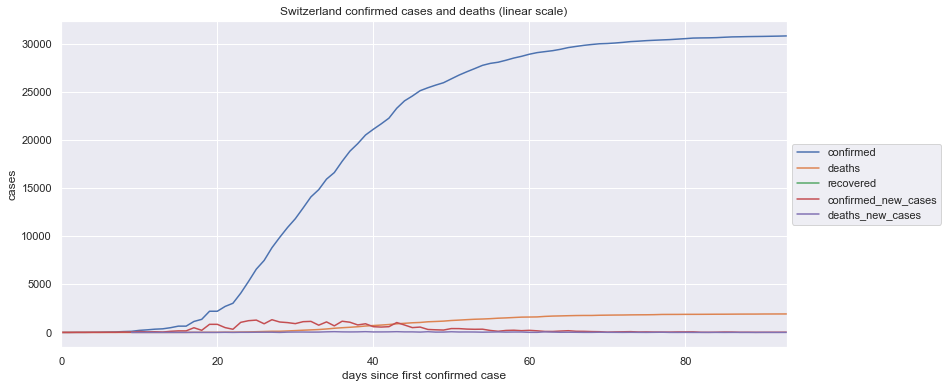

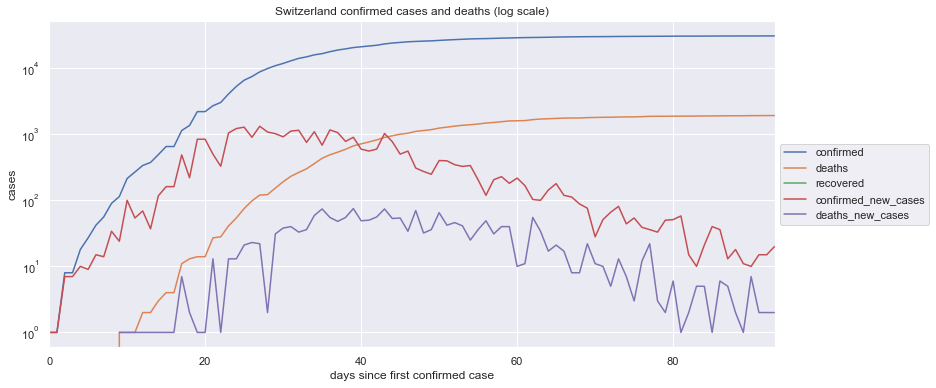

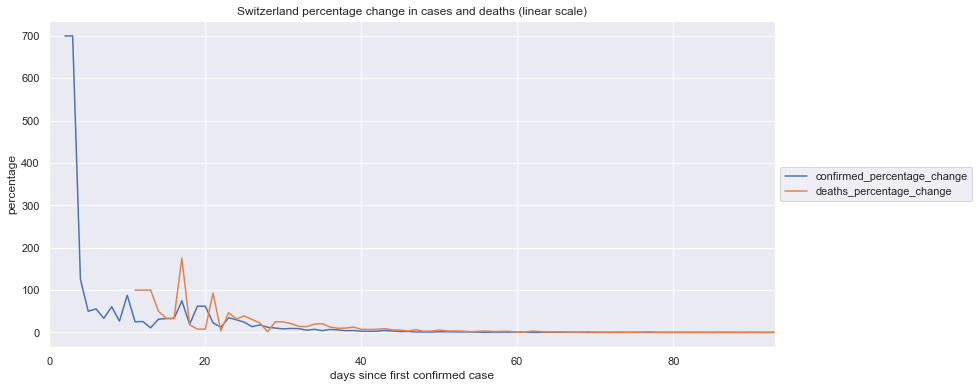

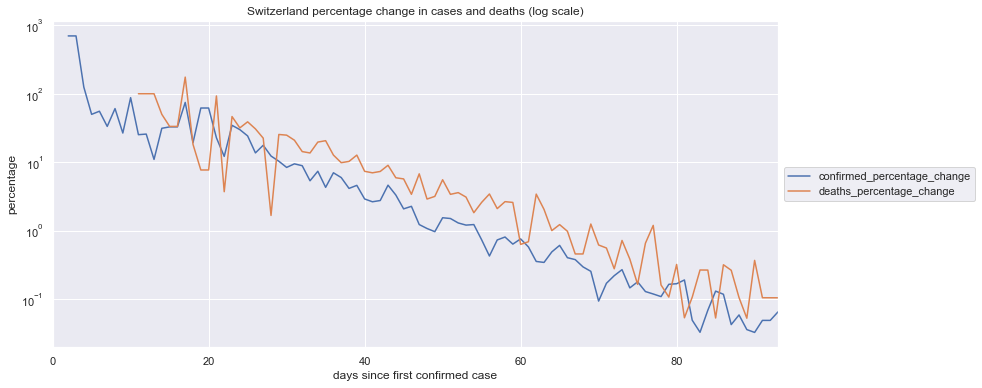

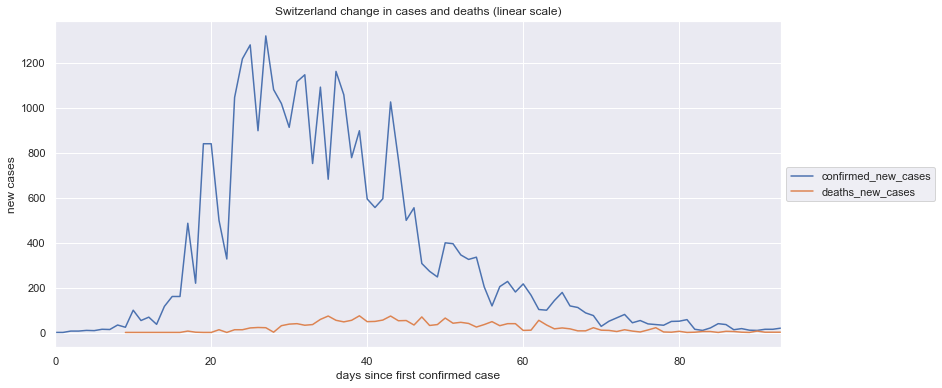

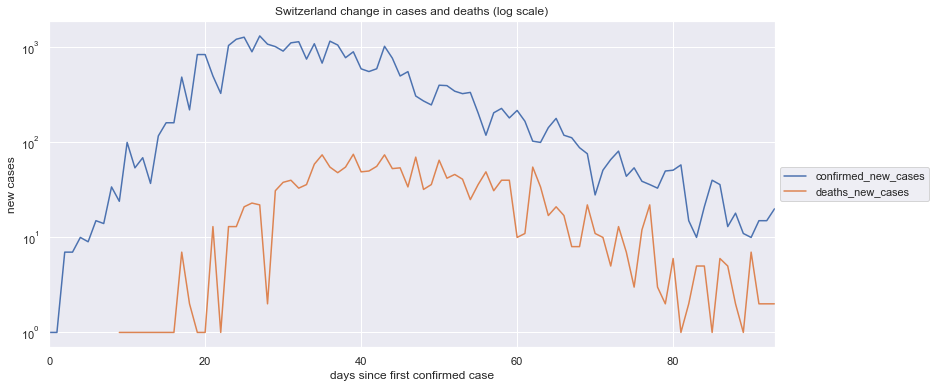

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
88       2878     171       NaN                     0.069541   
89       2882     172       NaN                     0.138985   
90       2892     173       NaN                     0.346981   
91       2903     173       NaN                     0.380360   
92       2906     175       NaN                     0.103341   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
88                                          42.205157                 
89                                          84.351655                 
90                                         210.586453                 
91                                         230.844112                 
92                                          62.718928                 

    deaths_percentage_change  \
88                  1.183432   
89                  0.584795   
90                  0.581395   
91                  0.581395   
92                  1.156069   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
88                                         718.236871           
89                                         354.918220           
90                                         352.854742           
91                                         352.854742           
92                                         701.630238           

    confirmed_new_cases  deaths_new_cases  
88                  2.0               2.0  
89                  4.0               1.0  
90                 10.0               1.0  
91                 11.0               1.0  
92                  3.0               2.0

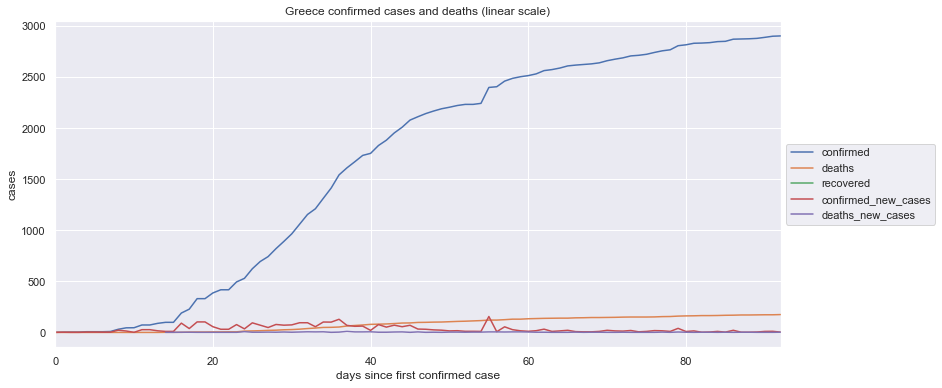

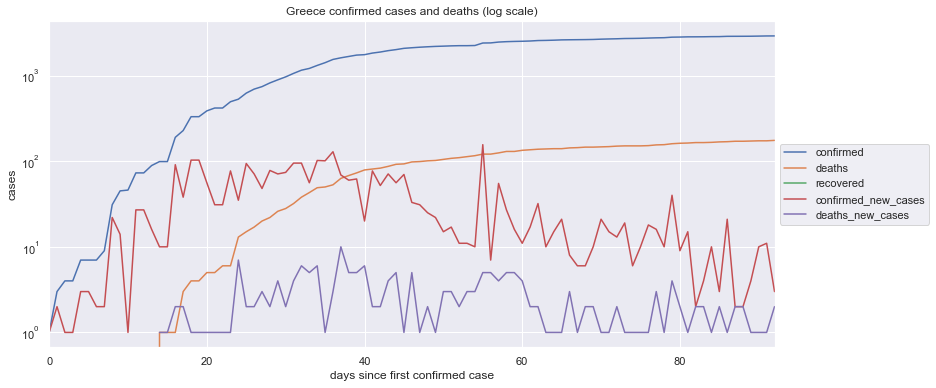

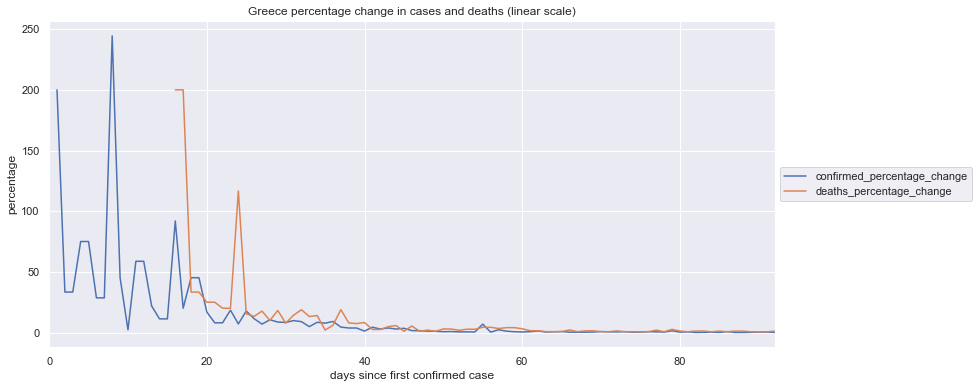

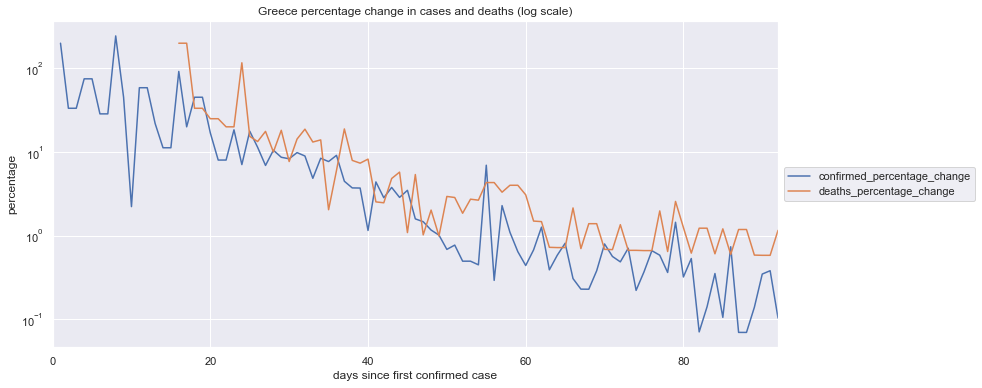

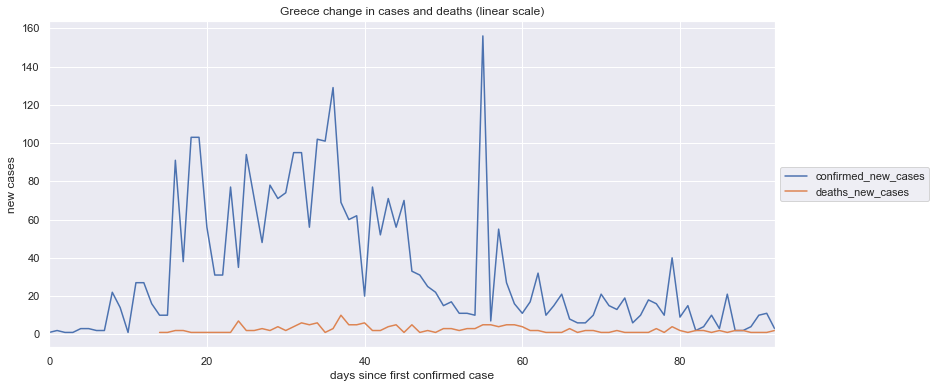

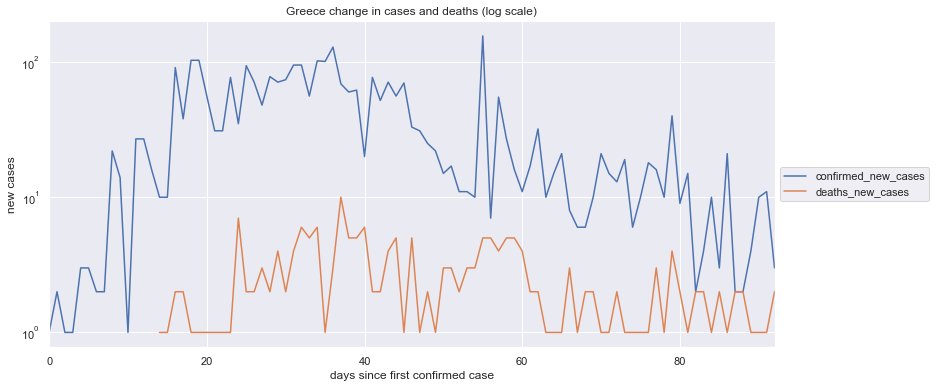

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
88       8352     235       NaN                     0.071891   
89       8364     235       NaN                     0.143678   
90       8383     235       NaN                     0.227164   
91       8401     235       NaN                     0.214720   
92       8411     236       NaN                     0.119033   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
88                                         134.921201                 
89                                         269.648550                 
90                                         426.330993                 
91                                         402.977100                 
92                                         223.396489                 

    deaths_percentage_change  \
88                  0.427350   
89                  0.425532   
90                  0.425532   
91                  0.425532   
92                  0.425532   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
88                                         802.031584           
89                                         798.618684           
90                                         798.618684           
91                                         798.618684           
92                                         798.618684           

    confirmed_new_cases  deaths_new_cases  
88                  6.0               1.0  
89                 12.0               1.0  
90                 19.0               1.0  
91                 18.0               1.0  
92                 10.0               1.0

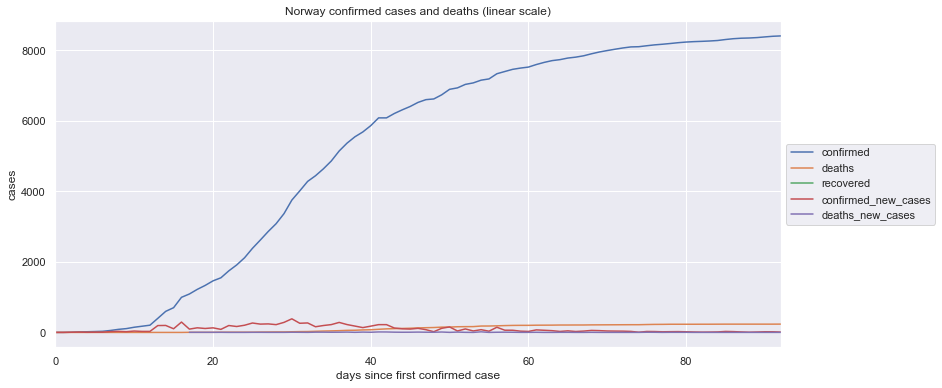

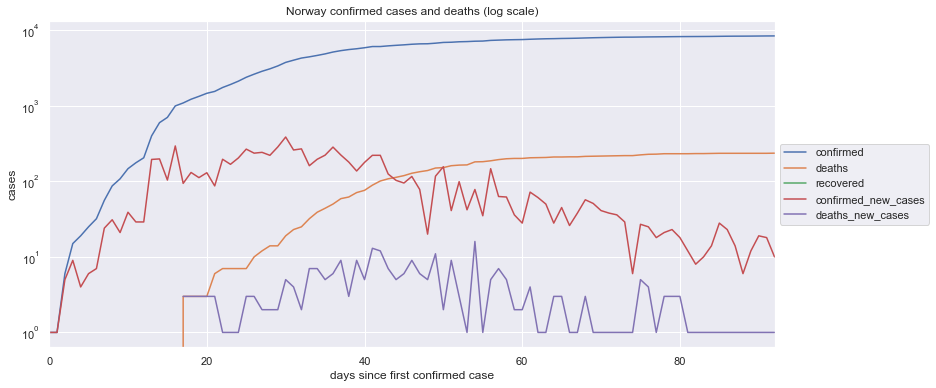

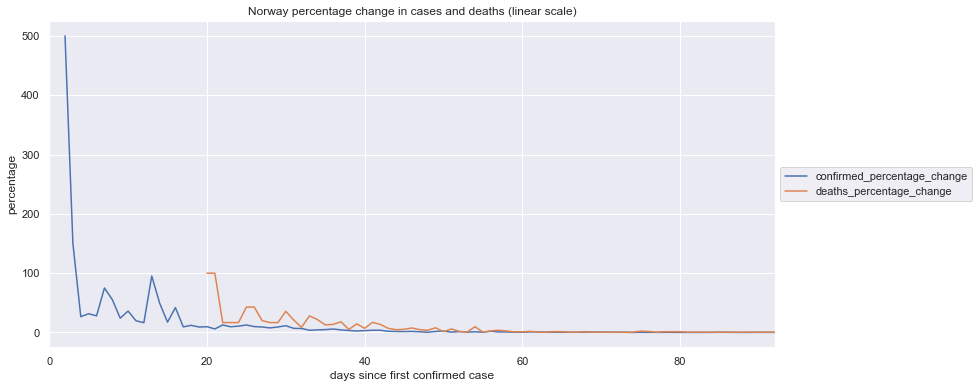

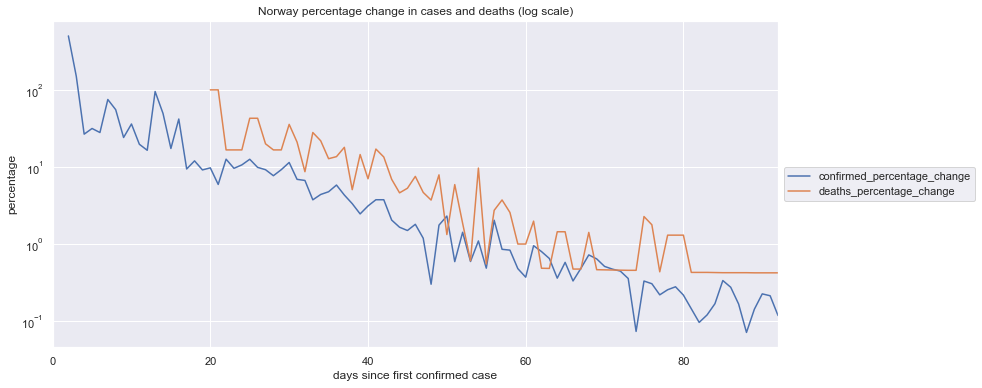

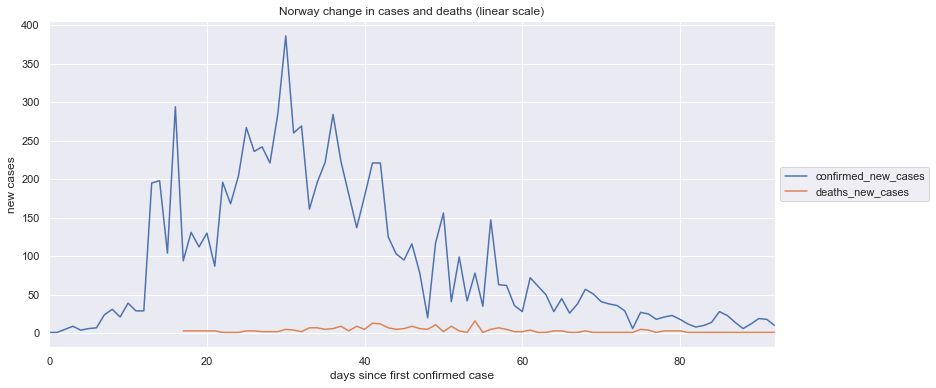

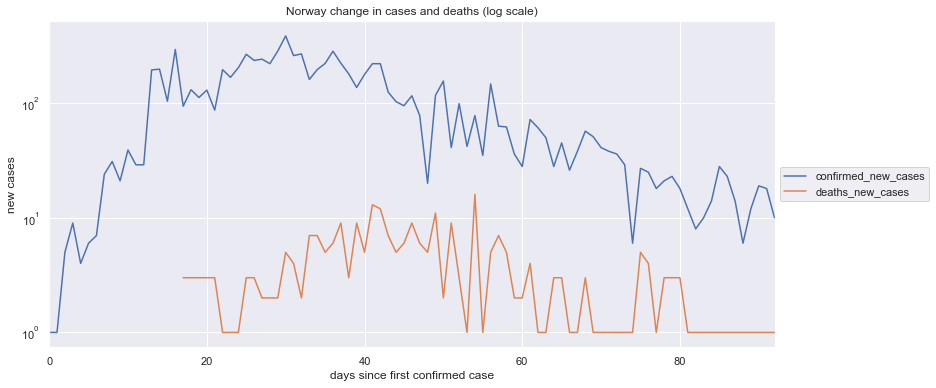

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
89      16503     640       NaN                     0.103118   
90      16539     641       NaN                     0.218142   
91      16557     643       NaN                     0.108834   
92      16591     645       NaN                     0.205351   
93      16628     668       NaN                     0.223012   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
89                                         383.659028                 
90                                         811.617490                 
91                                         404.925432                 
92                                         764.027630                 
93                                         829.737956                 

    deaths_percentage_change  \
89                  0.156495   
90                  0.156250   
91                  0.312012   
92                  0.311042   
93                  3.565891   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
89                                         582.251932           
90                                         581.342163           
91                                        1160.870466           
92                                        1157.259671           
93                                       13267.219598           

    confirmed_new_cases  deaths_new_cases  
89                 17.0               1.0  
90                 36.0               1.0  
91                 18.0               2.0  
92                 34.0               2.0  
93                 37.0              23.0

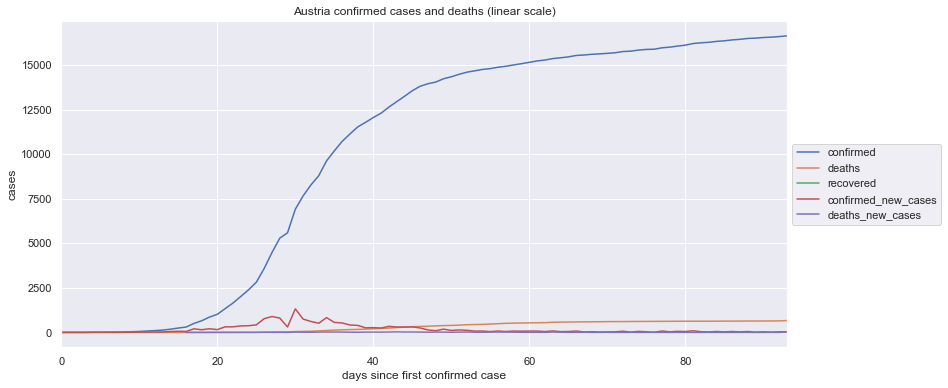

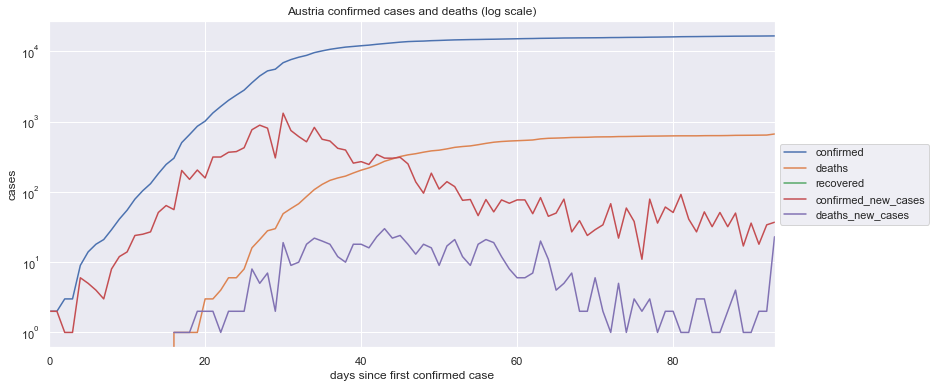

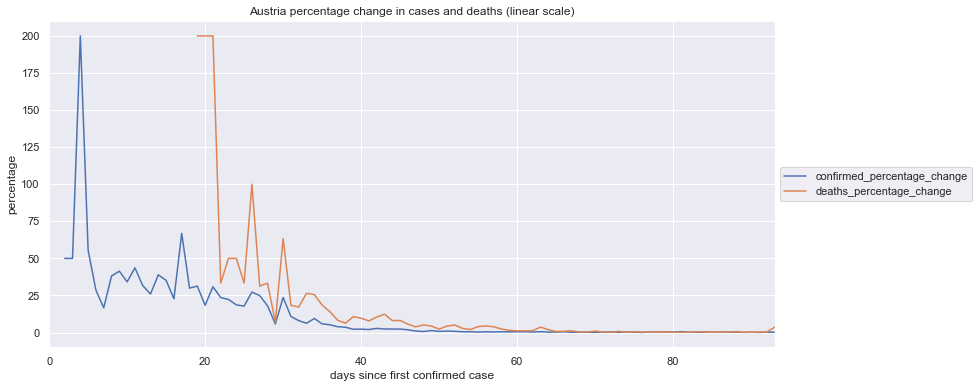

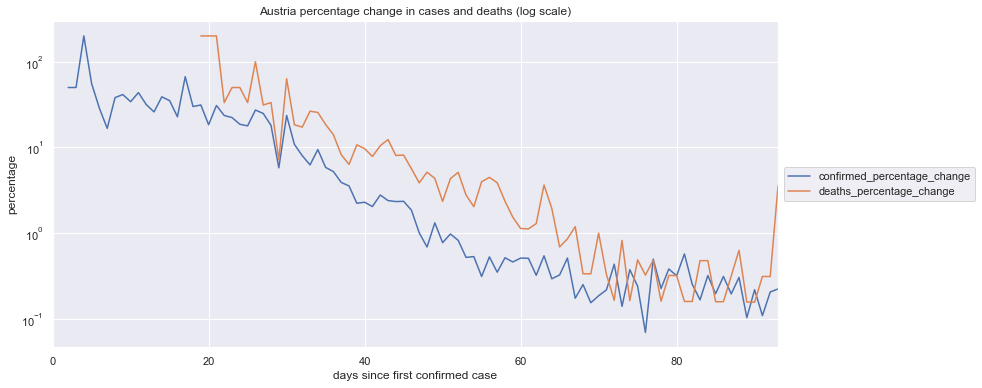

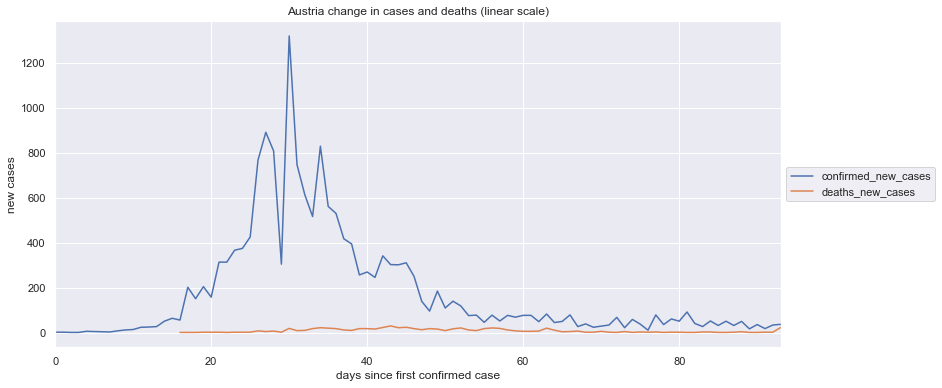

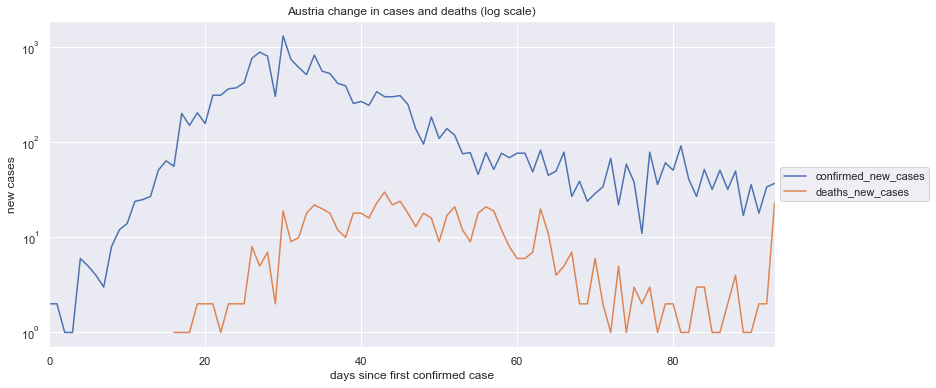

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
114      33459    3998       NaN                     0.816560   
115      33843    4029       NaN                     1.147673   
116      34440    4125       NaN                     1.764028   
117      35088    4220       NaN                     1.881533   
118      35727    4266       NaN                     1.821135   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
114                                        3900.586879                 
115                                        5482.264861                 
116                                        8426.499964                 
117                                        8987.804334                 
118                                        8699.293629                 

     deaths_percentage_change  \
114                  0.150301   
115                  0.775388   
116                  2.382725   
117                  2.303030   
118                  1.090047   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
114                                         717.963662           
115                                        3703.911917           
116                                       11381.924795           
117                                       11001.233902           
118                                        5206.994594           

     confirmed_new_cases  deaths_new_cases  
114                271.0               6.0  
115                384.0              31.0  
116                597.0              96.0  
117                648.0              95.0  
118                639.0              46.0

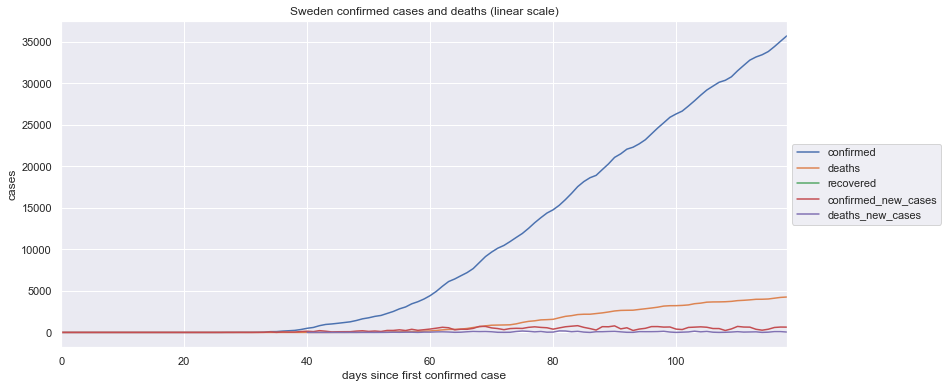

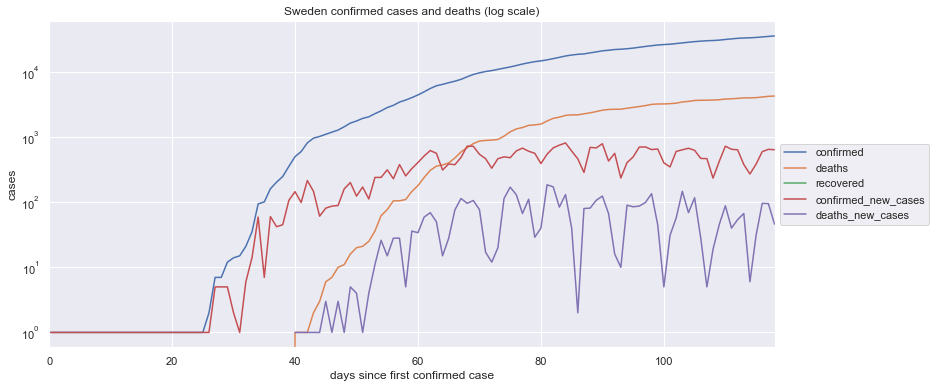

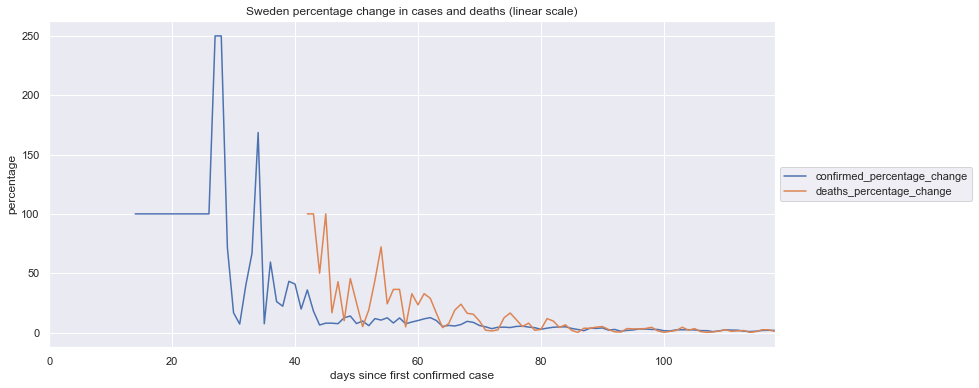

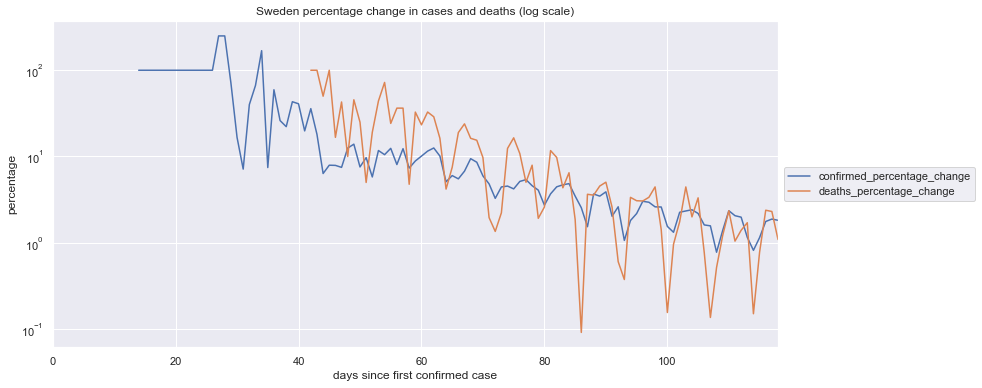

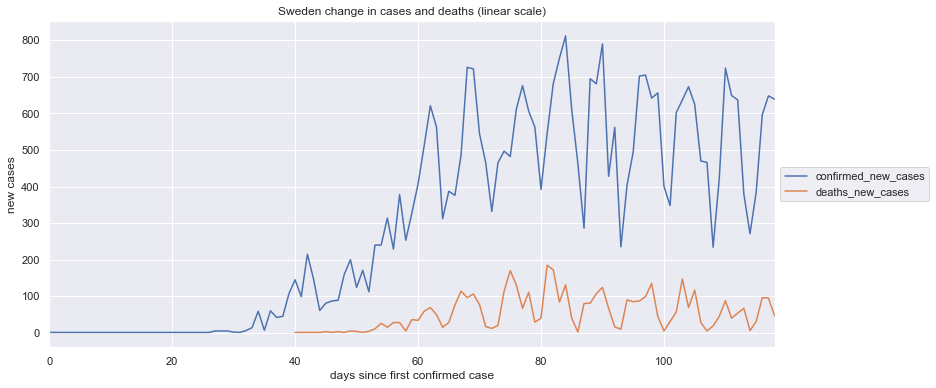

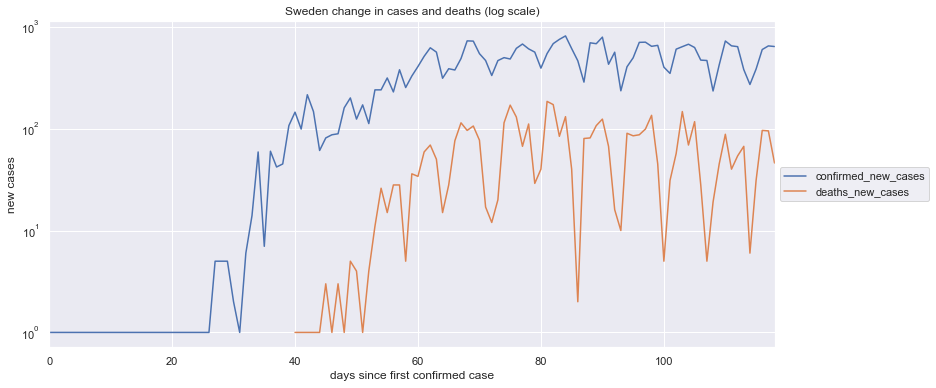

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
85      24639    1608       NaN                     0.231877   
86      24698    1606       NaN                     0.239458   
87      24735    1615       NaN                     0.149810   
88      24803    1631       NaN                     0.274914   
89      24841    1639       NaN                     0.153207   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
85                                         946.575286                 
86                                         977.521805                 
87                                         611.557727                 
88                                        1122.262672                 
89                                         625.427399                 

    deaths_percentage_change  \
85                  0.249377   
86                 -0.124378   
87                  0.560399   
88                  0.990712   
89                  0.490497   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
85                                        1018.012586           
86                                        -507.740108           
87                                        2287.675854           
88                                        4044.315015           
89                                        2002.320279           

    confirmed_new_cases  deaths_new_cases  
85                 57.0               4.0  
86                 59.0              -2.0  
87                 37.0               9.0  
88                 68.0              16.0  
89                 38.0               8.0

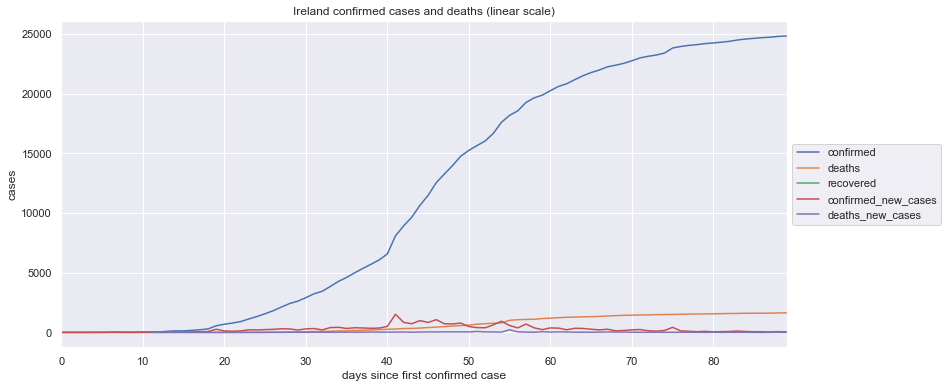

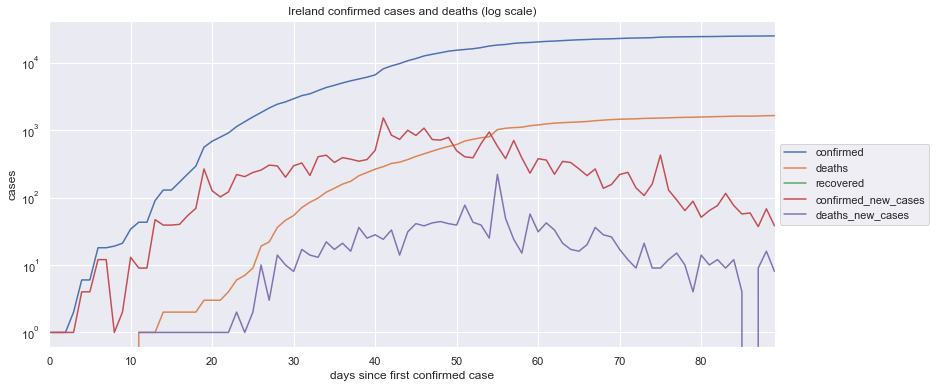

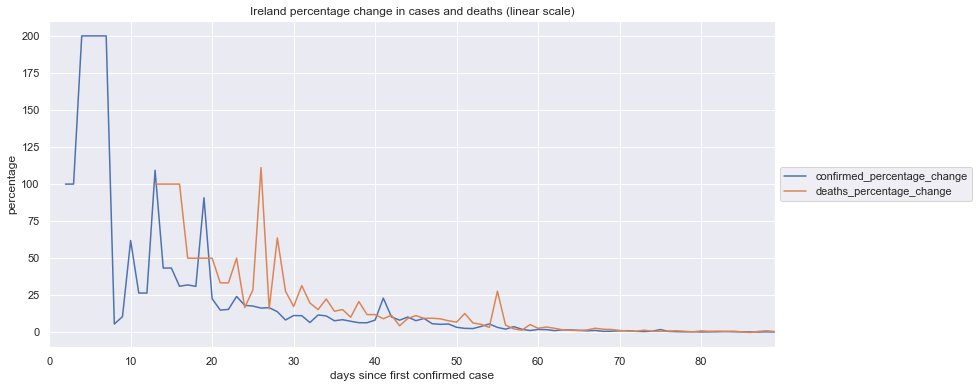

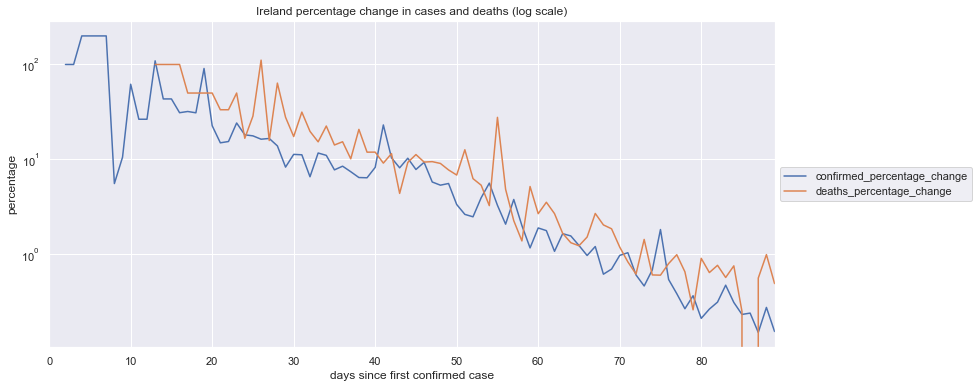

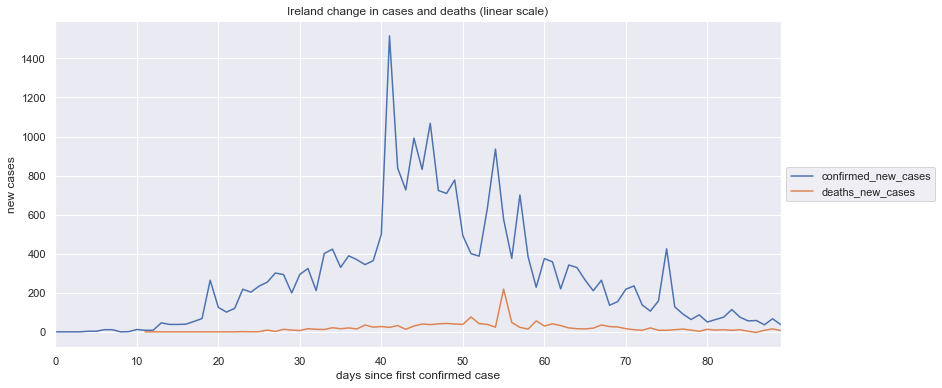

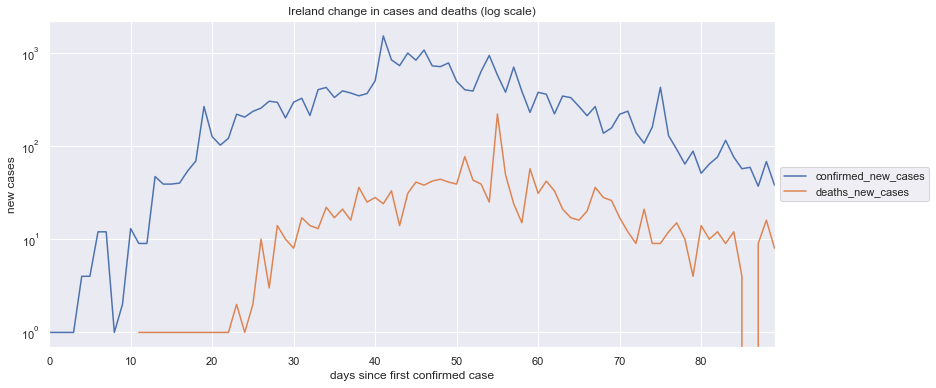

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
114     259559   36793       NaN                     0.935237   
115     261184   36914       NaN                     0.626062   
116     265227   37048       NaN                     1.547951   
117     267240   37460       NaN                     0.758973   
118     269127   37837       NaN                     0.706107   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
114                                       35155.162746                 
115                                       23533.395263                 
116                                       58186.802017                 
117                                       28529.447294                 
118                                       26542.251088                 

     deaths_percentage_change  \
114                  0.321745   
115                  0.328867   
116                  0.363006   
117                  1.112071   
118                  1.006407   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
114                                       12094.257221           
115                                       12361.964328           
116                                       13645.234595           
117                                       41802.260201           
118                                       37830.396517           

     confirmed_new_cases  deaths_new_cases  
114               2405.0             118.0  
115               1625.0             121.0  
116               4043.0             134.0  
117               2013.0             412.0  
118               1887.0             377.0

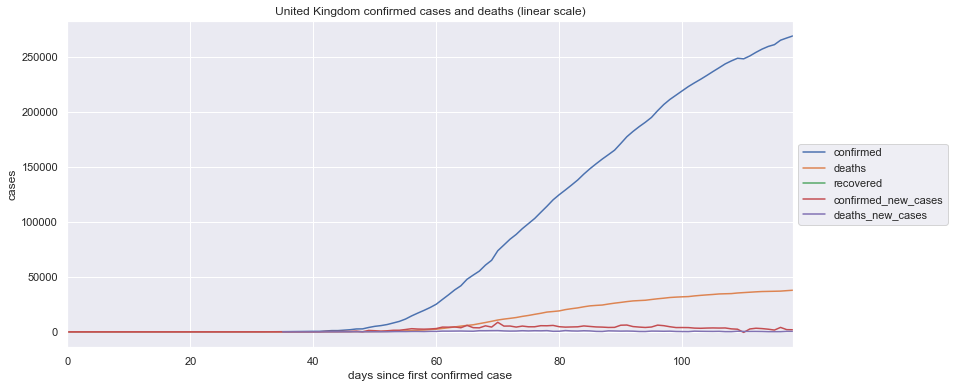

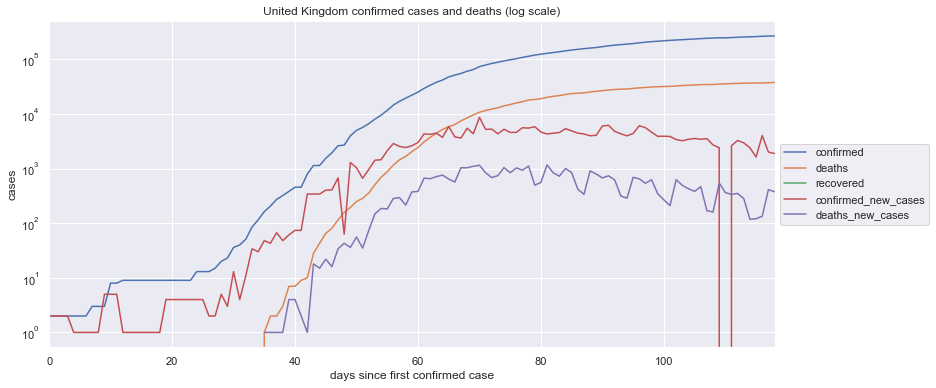

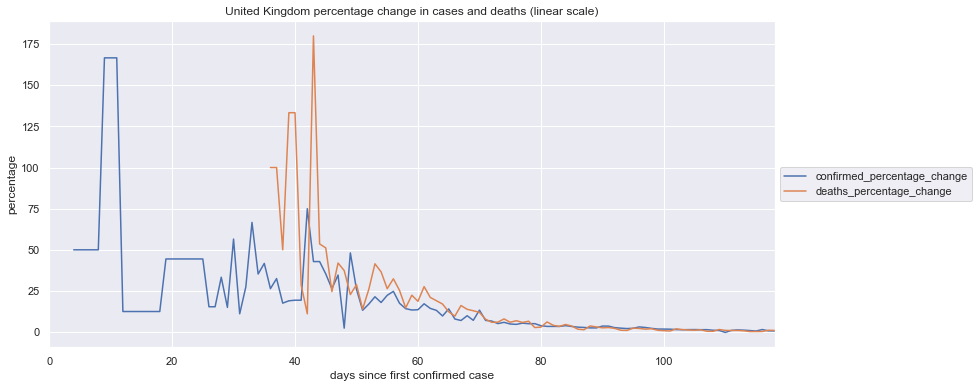

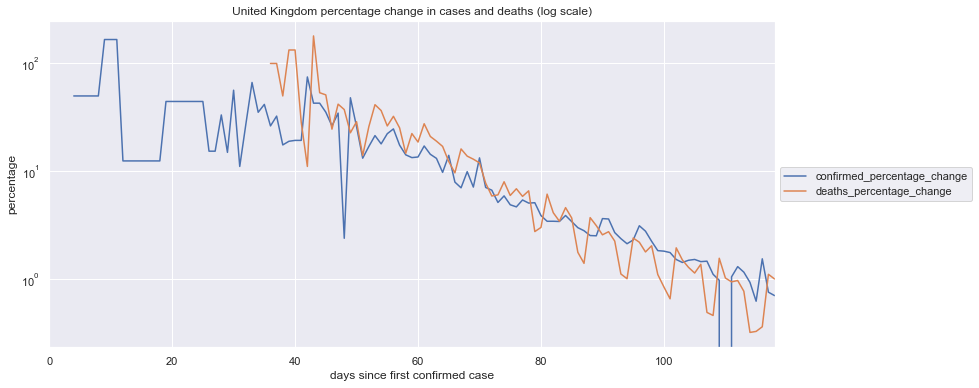

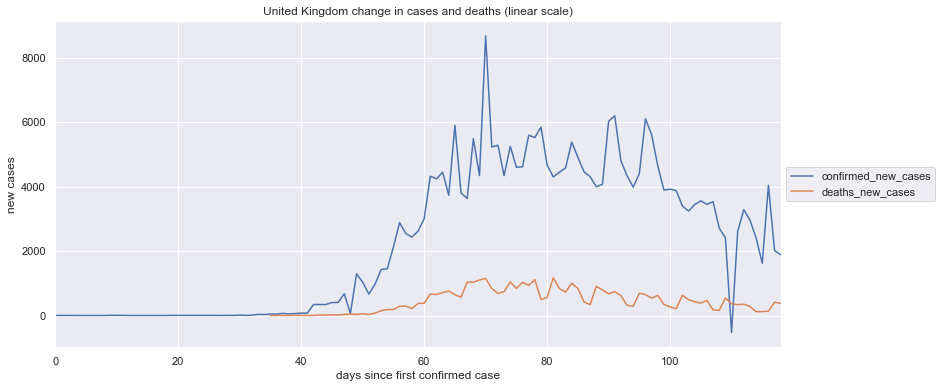

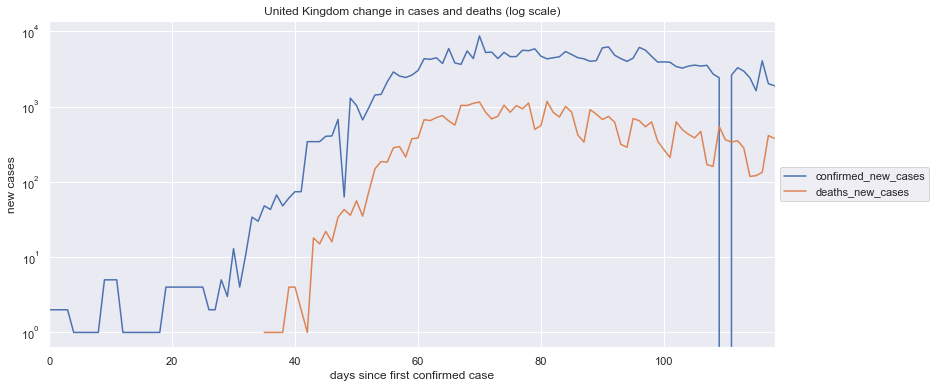

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
118     180328    8283       NaN                     0.190015   
119     180600    8309       NaN                     0.150836   
120     181200    8372       NaN                     0.332226   
121     181524    8428       NaN                     0.178808   
122     182196    8470       NaN                     0.370199   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
118                                        6984.510544                 
119                                        5544.397189                 
120                                       12211.867992                 
121                                        6572.572925                 
122                                       13607.671506                 

     deaths_percentage_change  \
118                  0.266312   
119                  0.313896   
120                  0.758214   
121                  0.668896   
122                  0.498339   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
118                                        9789.007365           
119                                       11538.099590           
120                                       27870.219369           
121                                       24587.105456           
122                                       18317.801988           

     confirmed_new_cases  deaths_new_cases  
118                342.0              22.0  
119                272.0              26.0  
120                600.0              63.0  
121                324.0              56.0  
122                672.0              42.0

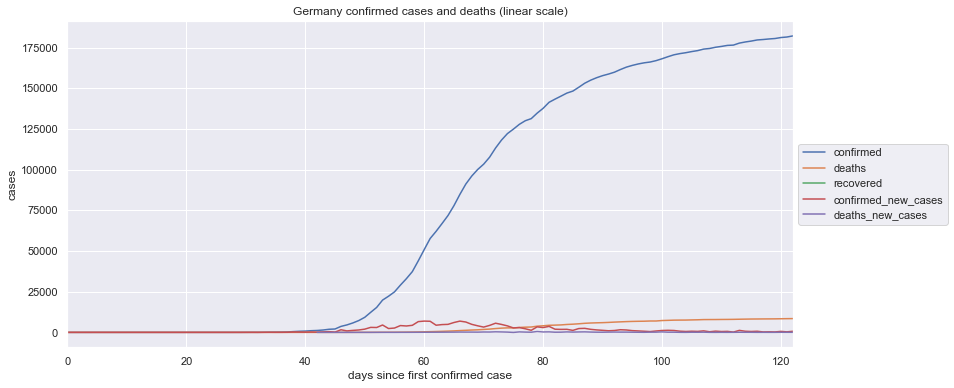

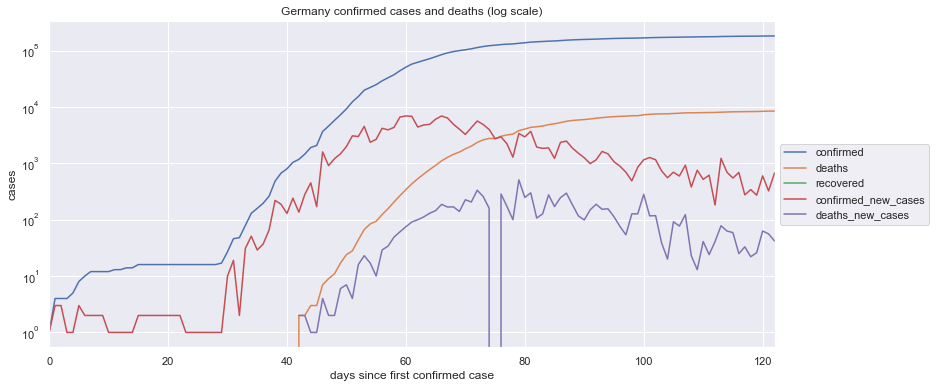

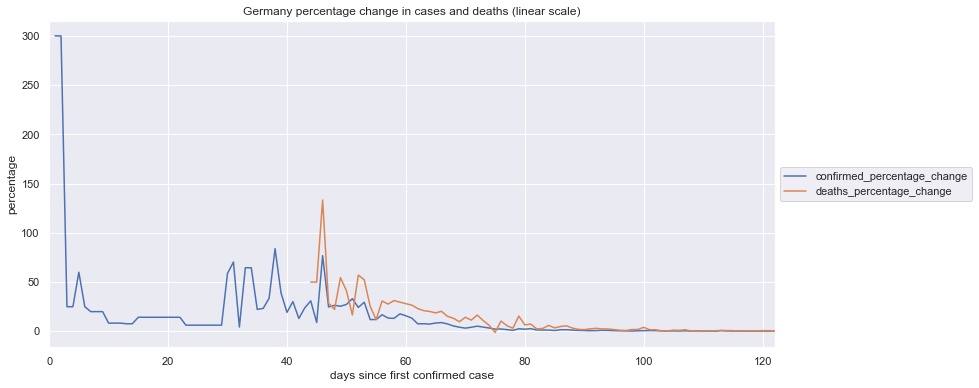

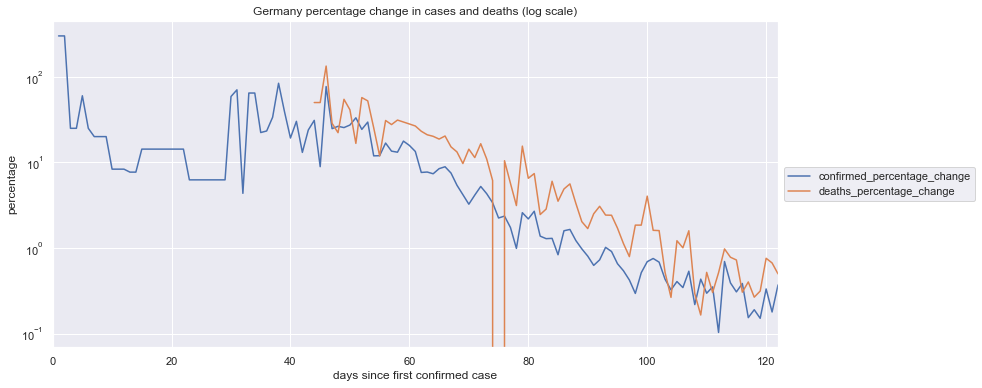

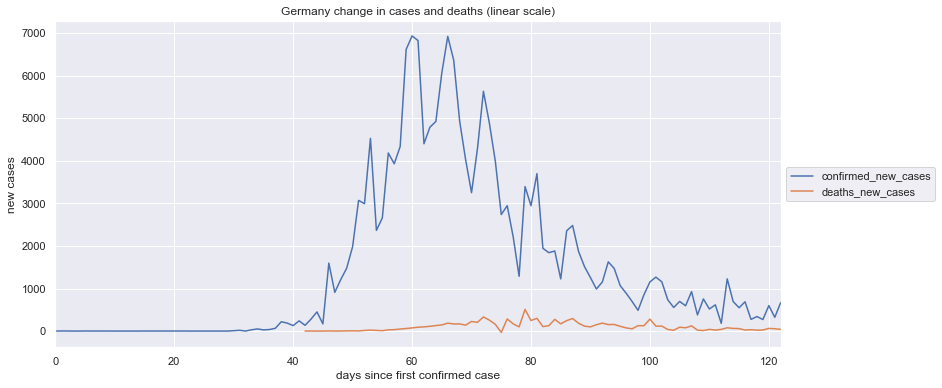

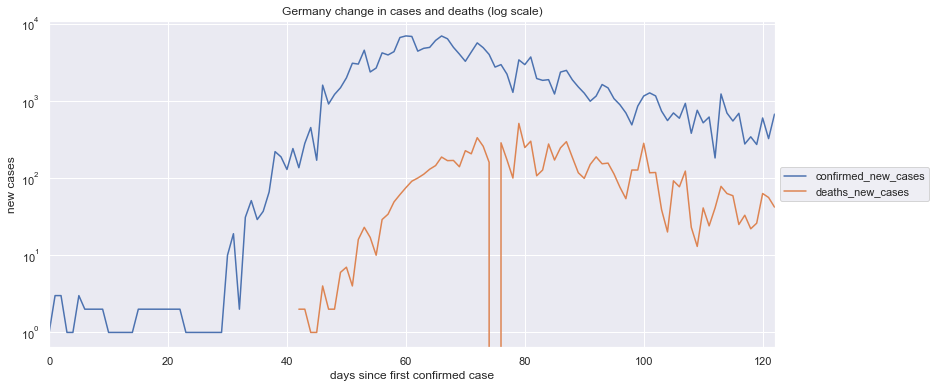

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
114     229858   32785       NaN                     0.231547   
115     230158   32877       NaN                     0.130515   
116     230555   32955       NaN                     0.172490   
117     231139   33072       NaN                     0.253302   
118     231732   33142       NaN                     0.256556   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
114                                       11178.675739                 
115                                        6301.046121                 
116                                        8327.515680                 
117                                       12228.954507                 
118                                       12386.040357                 

     deaths_percentage_change  \
114                  0.152742   
115                  0.280616   
116                  0.237248   
117                  0.355030   
118                  0.211659   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
114                                        7374.094289           
115                                       13547.640594           
116                                       11453.901616           
117                                       17140.187685           
118                                       10218.534325           

     confirmed_new_cases  deaths_new_cases  
114                531.0              50.0  
115                300.0              92.0  
116                397.0              78.0  
117                584.0             117.0  
118                593.0              70.0

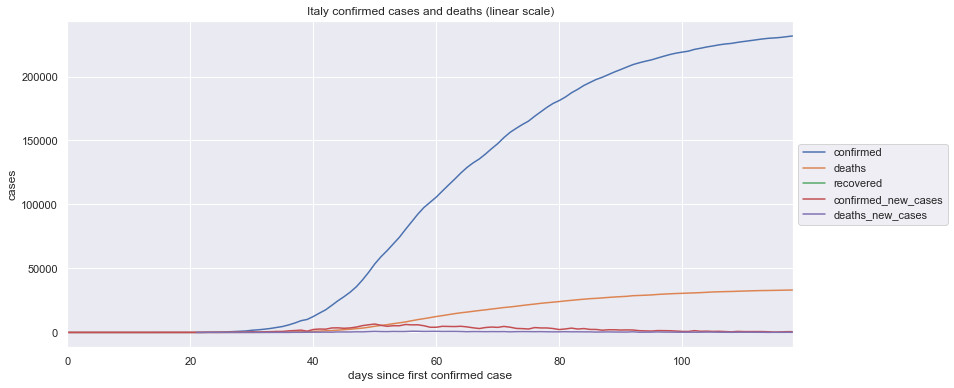

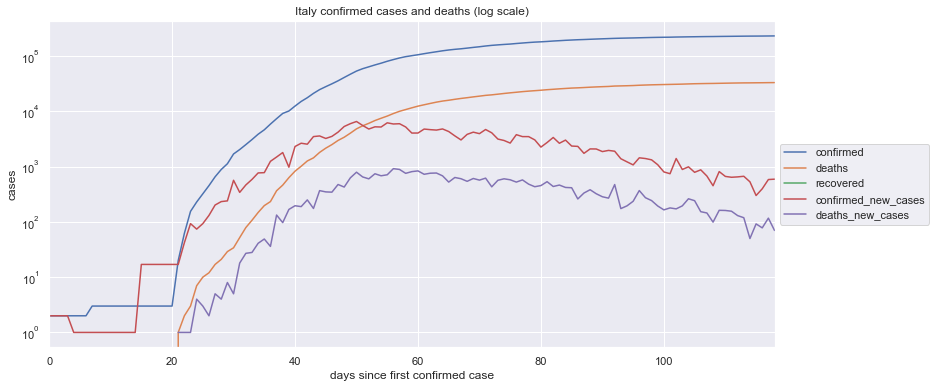

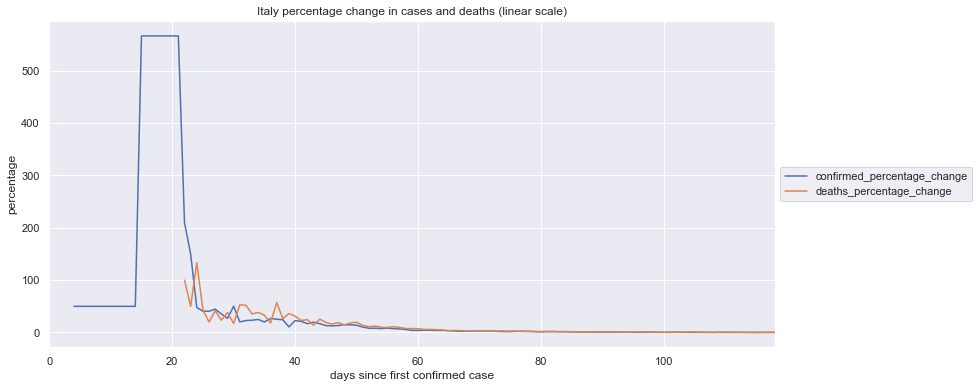

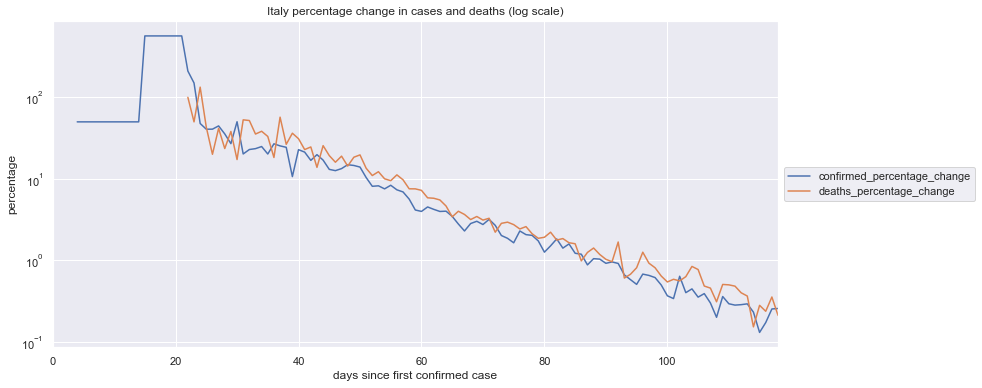

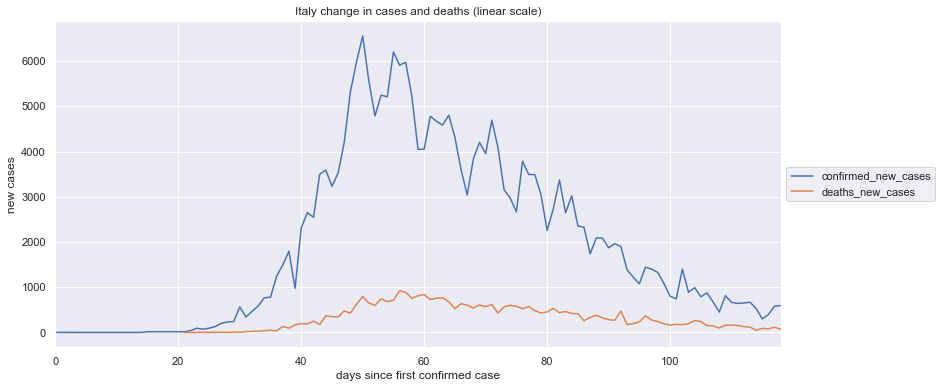

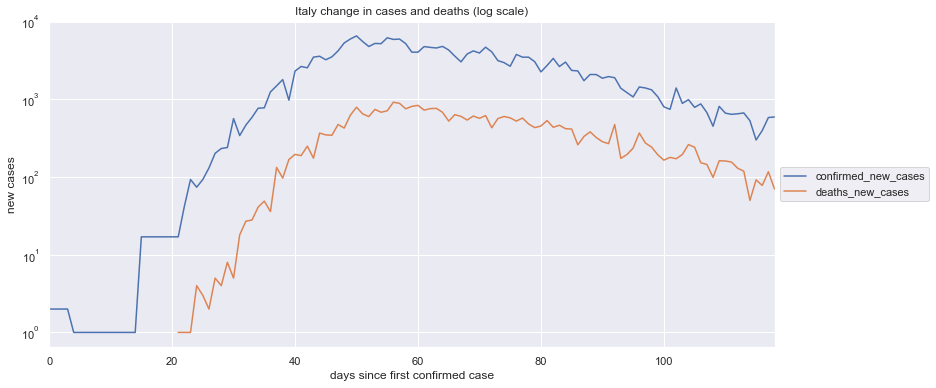

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
123    1643246   97719       NaN                     1.271653   
124    1662302   98219       NaN                     1.159656   
125    1680913   98912       NaN                     1.119592   
126    1699176  100417       NaN                     1.086493   
127    1721753  101616       NaN                     1.328703   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
123                                      300625.291790                 
124                                      274148.537164                 
125                                      264677.213779                 
126                                      256852.416302                 
127                                      314112.081154                 

     deaths_percentage_change  \
123                  0.651999   
124                  0.511671   
125                  0.705566   
126                  1.521555   
127                  1.194021   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
123                                      154135.925430           
124                                      120961.666871           
125                                      166799.405729           
126                                      359703.189767           
127                                      282272.593224           

     confirmed_new_cases  deaths_new_cases  
123              20634.0             633.0  
124              19056.0             500.0  
125              18611.0             693.0  
126              18263.0            1505.0  
127              22577.0            1199.0

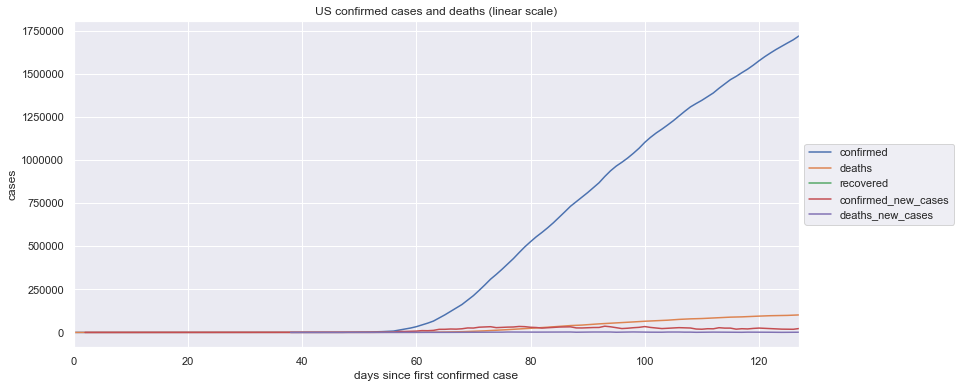

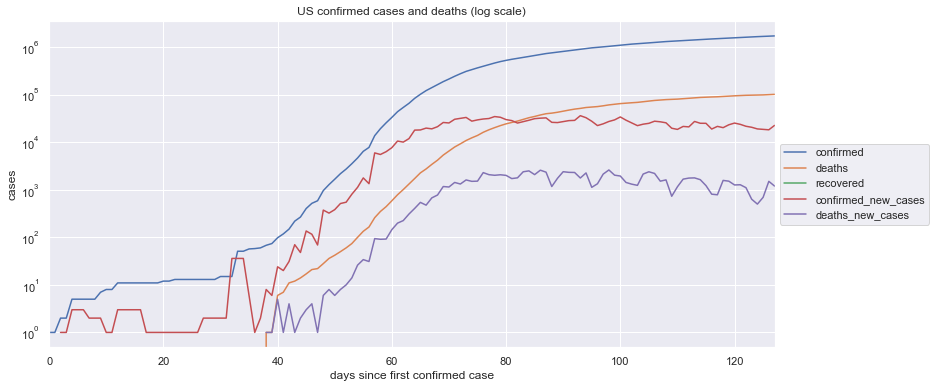

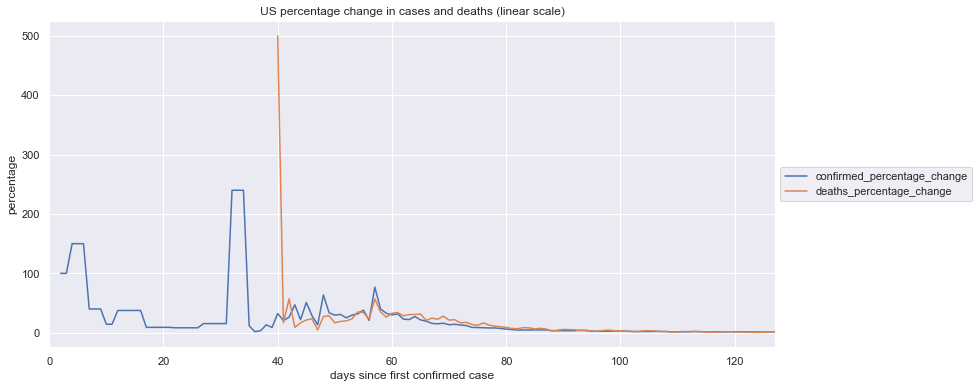

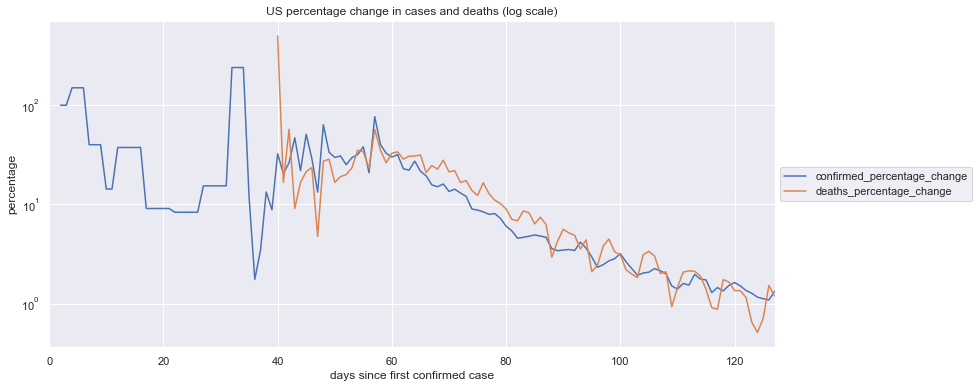

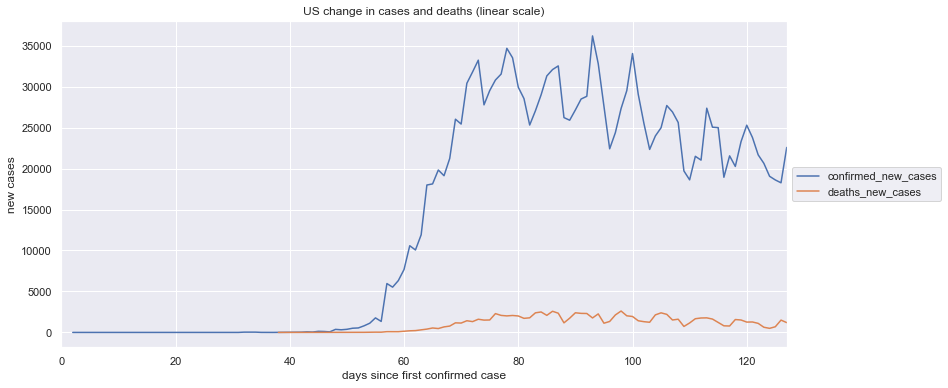

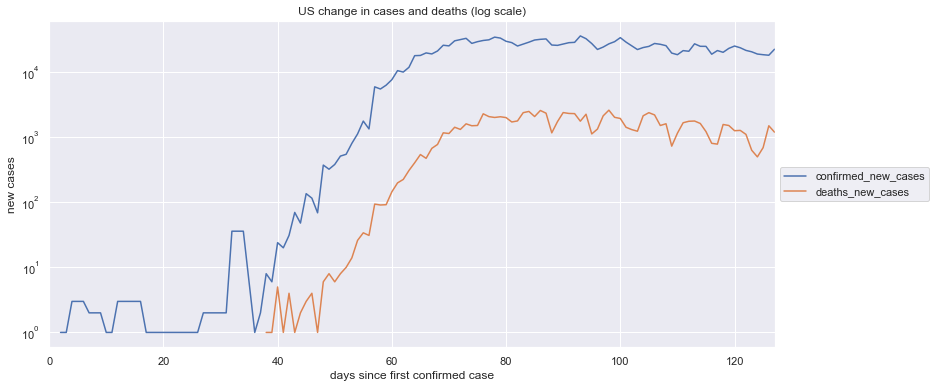

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
123                  11206                 267                   NaN   
124                  11225                 269                   NaN   
125                  11265                 269                   NaN   
126                  11344                 269                   NaN   
127                  11402                 269                   NaN   

     confirmed_percentage_change_South_Korea  \
123                                 0.142985   
124                                 0.169552   
125                                 0.356347   
126                                 0.701287   
127                                 0.511283   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
123                                         492.102324                             
124                                         583.537140                             
125                                        1226.419822                             
126                                        2413.578423                             
127                                        1759.654057                             

     deaths_percentage_change_South_Korea  \
123                              0.375940   
124                              0.749064   
125                                   NaN   
126                                   NaN   
127                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
123                                        1293.849859                       
124                                        2578.007959                       
125                                                NaN                       
126                                                NaN                       
127                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
123                             16.0                           1.0   
124                             19.0                           2.0   
125                             40.0                           NaN   
126                             79.0                           NaN   
127                             58.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
123               NaN            NaN              NaN   
124               NaN            NaN              NaN   
125               NaN            NaN              NaN   
126               NaN            NaN              NaN   
127               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
123                                 NaN   
124                                 NaN   
125                                 NaN   
126                                 NaN   
127                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
123                                                NaN                        
124                                                NaN                        
125                                                NaN                        
126                                                NaN                        
127                                                NaN                        

     deaths_percentage_change_Sweden  \
123                              NaN   
124                              NaN   
125                              NaN   
126                              NaN   
127                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
123                                                NaN                  
124                                                NaN                  
125                                                NaN                  
126    

# comparisons: confirmed cases

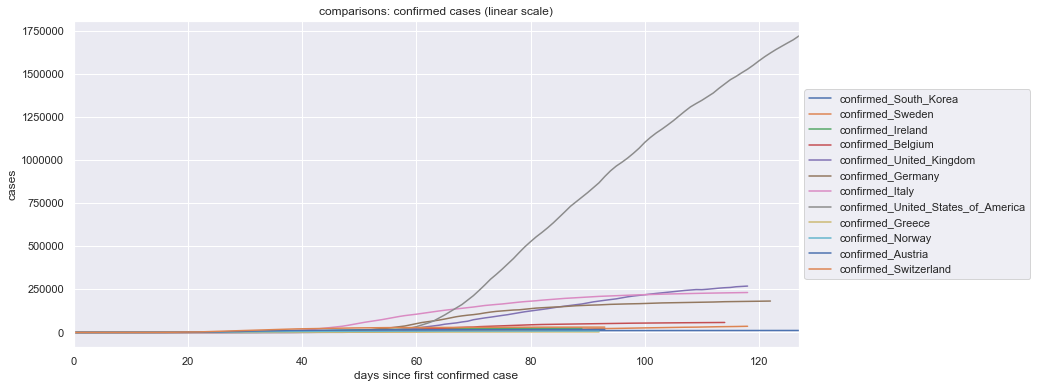

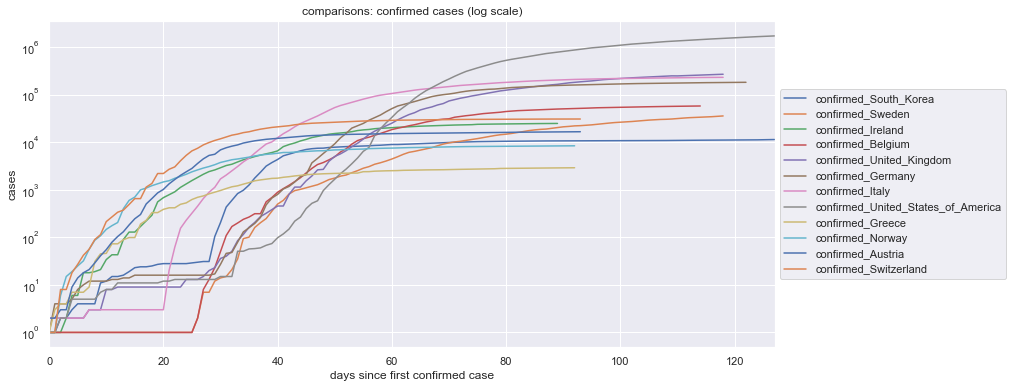

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

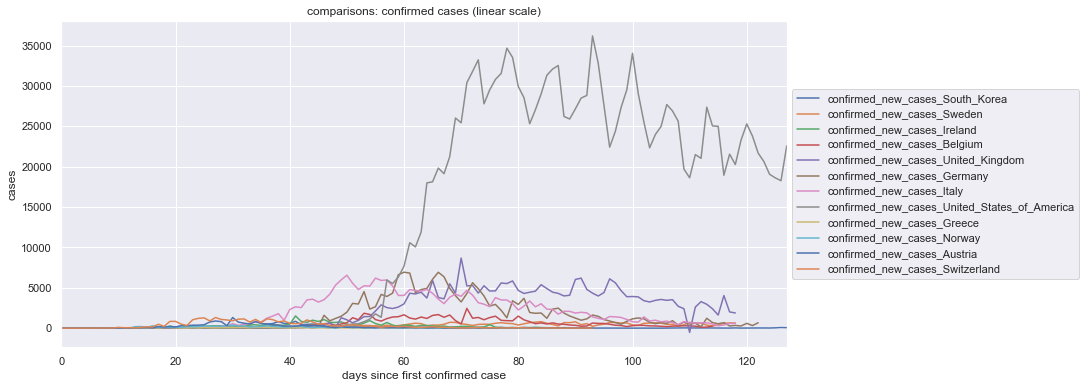

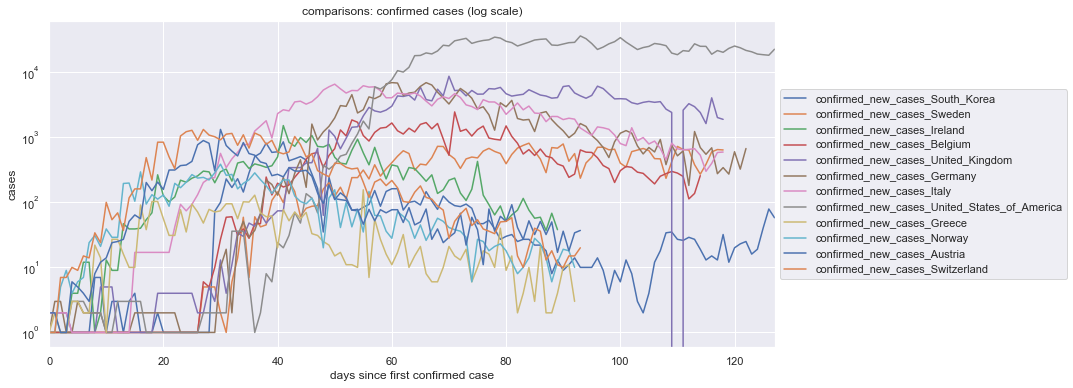

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

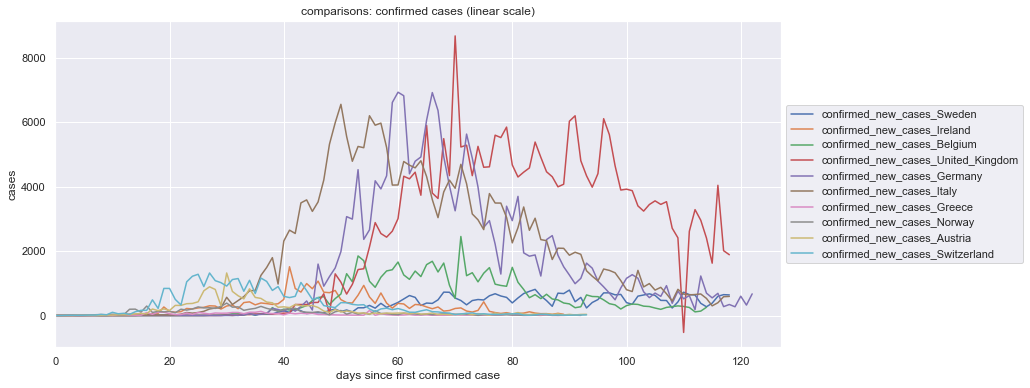

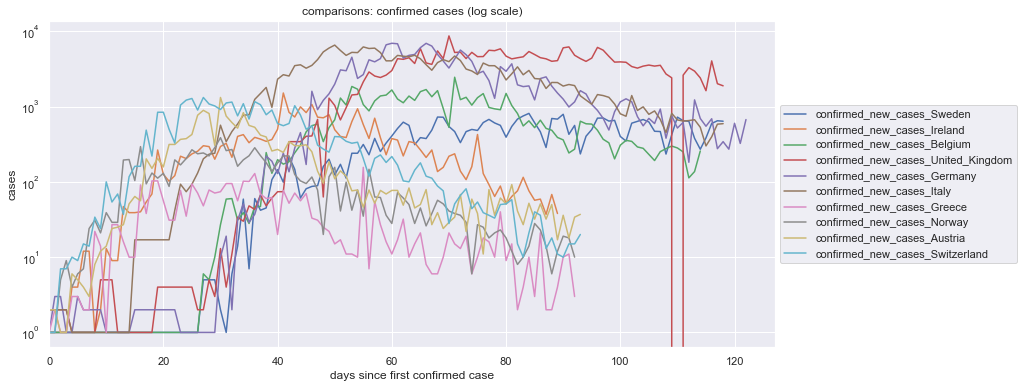

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
123                 267            NaN             NaN             NaN   
124                 269            NaN             NaN             NaN   
125                 269            NaN             NaN             NaN   
126                 269            NaN             NaN             NaN   
127                 269            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
123                    NaN             NaN           NaN   
124                    NaN             NaN           NaN   
125                    NaN             NaN           NaN   
126                    NaN             NaN           NaN   
127                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
123                            97719            NaN            NaN   
124                            98219            NaN            NaN   
125                            98912            NaN            NaN   
126                           100417            NaN            NaN   
127                           101616            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
123             NaN                 NaN  
124             NaN                 NaN  
125             NaN                 NaN  
126             NaN                 NaN  
127             NaN                 NaN

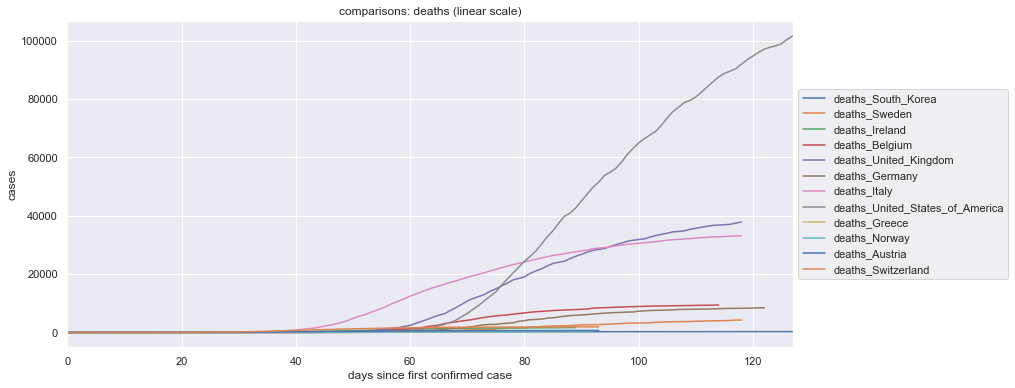

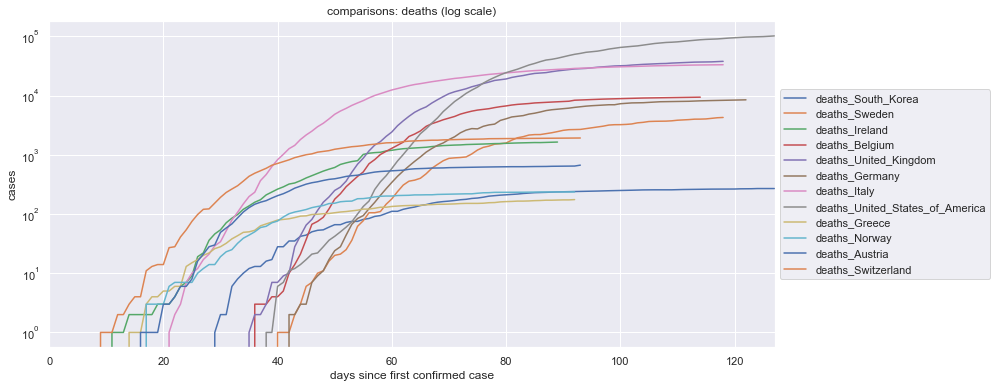

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
123            NaN             NaN             NaN                    NaN   
124            NaN             NaN             NaN                    NaN   
125            NaN             NaN             NaN                    NaN   
126            NaN             NaN             NaN                    NaN   
127            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
123             NaN           NaN            NaN            NaN   
124             NaN           NaN            NaN            NaN   
125             NaN           NaN            NaN            NaN   
126             NaN           NaN            NaN            NaN   
127             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
123             NaN                 NaN  
124             NaN                 NaN  
125             NaN                 NaN  
126             NaN                 NaN  
127             NaN                 NaN

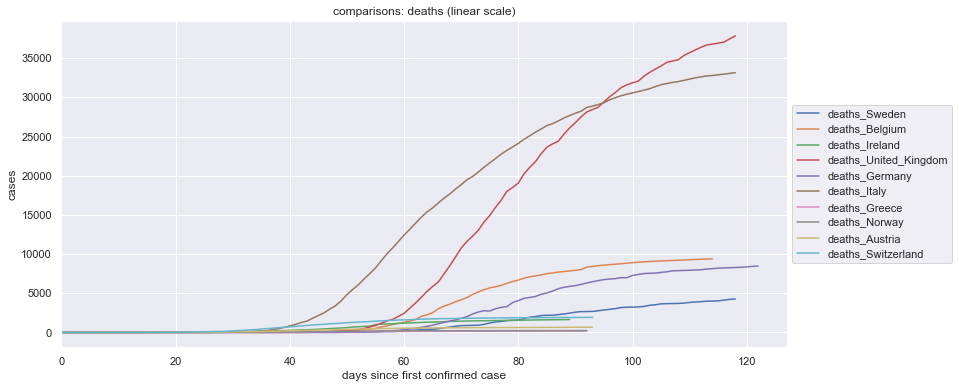

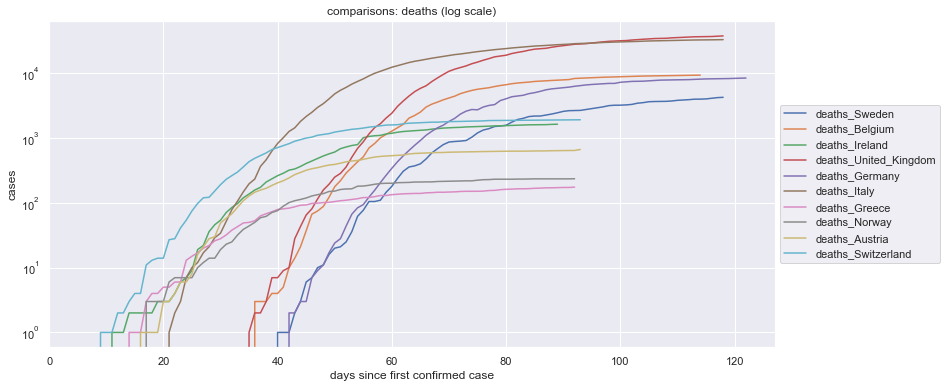

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
123                           1.0                      NaN   
124                           2.0                      NaN   
125                           NaN                      NaN   
126                           NaN                      NaN   
127                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
123                       NaN                       NaN   
124                       NaN                       NaN   
125                       NaN                       NaN   
126                       NaN                       NaN   
127                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
123                              NaN                       NaN   
124                              NaN                       NaN   
125                              NaN                       NaN   
126                              NaN                       NaN   
127                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
123                     NaN                                      633.0   
124                     NaN                                      500.0   
125                     NaN                                      693.0   
126                     NaN                                     1505.0   
127                     NaN                                     1199.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
123                      NaN                      NaN   
124                      NaN                      NaN   
125                      NaN                      NaN   
126                      NaN                      NaN   
127                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
123                       NaN                           NaN  
124                       NaN                           NaN  
125                       NaN                           NaN  
126                       NaN                           NaN  
127                       NaN                           NaN

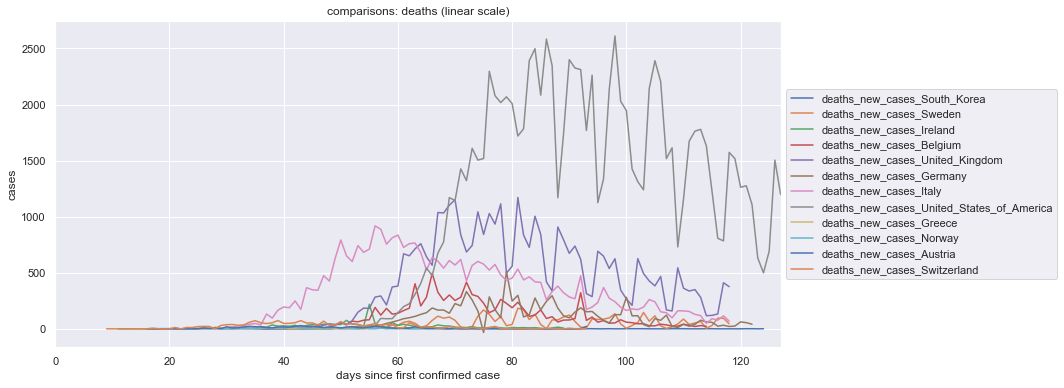

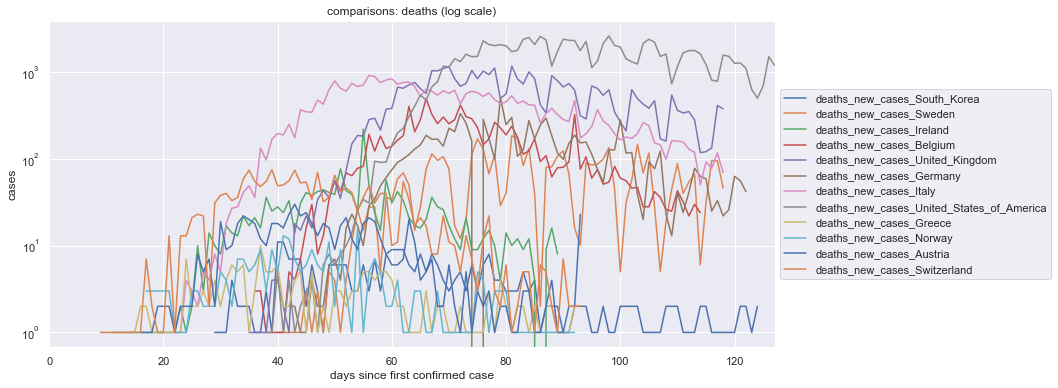

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
123                      NaN                       NaN   
124                      NaN                       NaN   
125                      NaN                       NaN   
126                      NaN                       NaN   
127                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
123                       NaN                              NaN   
124                       NaN                              NaN   
125                       NaN                              NaN   
126                       NaN                              NaN   
127                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
123                       NaN                     NaN   
124                       NaN                     NaN   
125                       NaN                     NaN   
126                       NaN                     NaN   
127                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
123                      NaN                      NaN   
124                      NaN                      NaN   
125                      NaN                      NaN   
126                      NaN                      NaN   
127                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
123                       NaN                           NaN  
124                       NaN                           NaN  
125                       NaN                           NaN  
126                       NaN                           NaN  
127                       NaN                           NaN

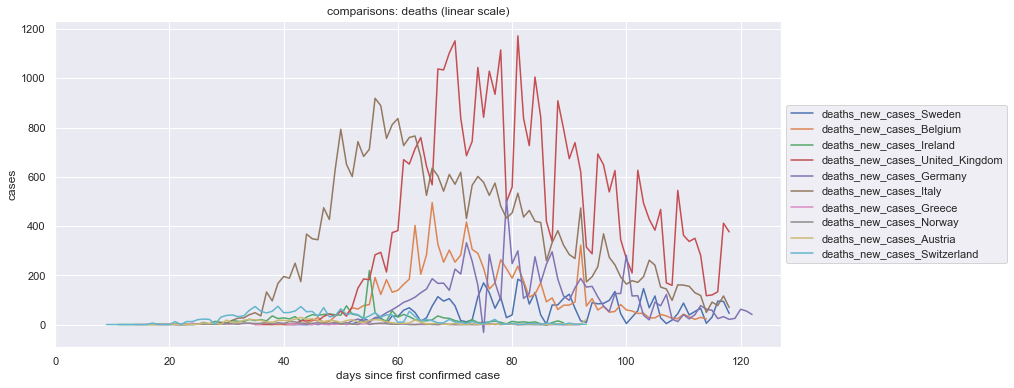

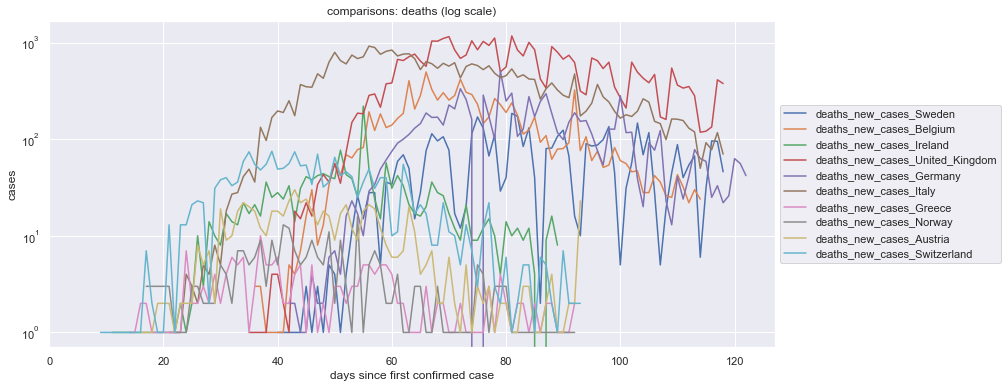

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
123                                 0.142985   
124                                 0.169552   
125                                 0.356347   
126                                 0.701287   
127                                 0.511283   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
123                                 NaN                                  NaN   
124                                 NaN                                  NaN   
125                                 NaN                                  NaN   
126                                 NaN                                  NaN   
127                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
123                                  NaN   
124                                  NaN   
125                                  NaN   
126                                  NaN   
127                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
123                                         NaN   
124                                         NaN   
125                                         NaN   
126                                         NaN   
127                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
123                                  NaN                                NaN   
124                                  NaN                                NaN   
125                                  NaN                                NaN   
126                                  NaN                                NaN   
127                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
123                                           1.271653      
124                                           1.159656      
125                                           1.119592      
126                                           1.086493      
127                                           1.328703      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
123                                 NaN                                 NaN   
124                                 NaN                                 NaN   
125                                 NaN                                 NaN   
126                                 NaN                                 NaN   
127                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
123                                  NaN   
124                                  NaN   
125                                  NaN   
126                                  NaN   
127                                  NaN   

     confirmed_percentage_change_Switzerland  
123                                      NaN  
124                                      NaN  
125                                      NaN  
126                                      NaN  
127                                      NaN

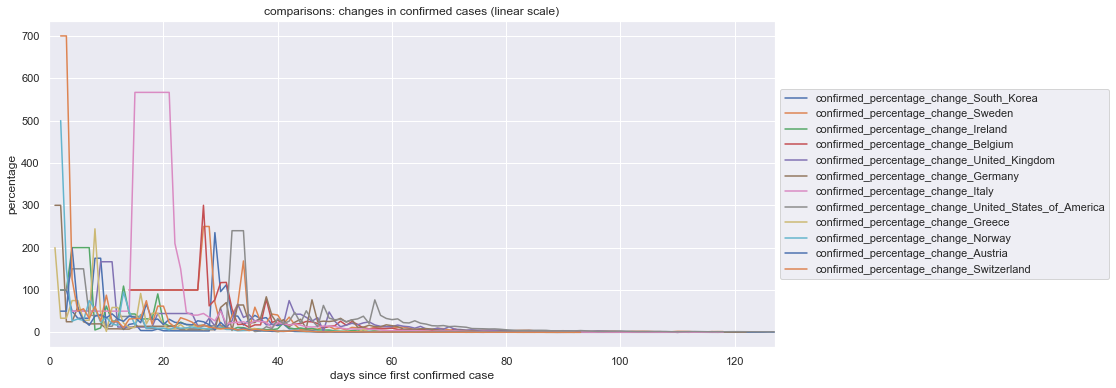

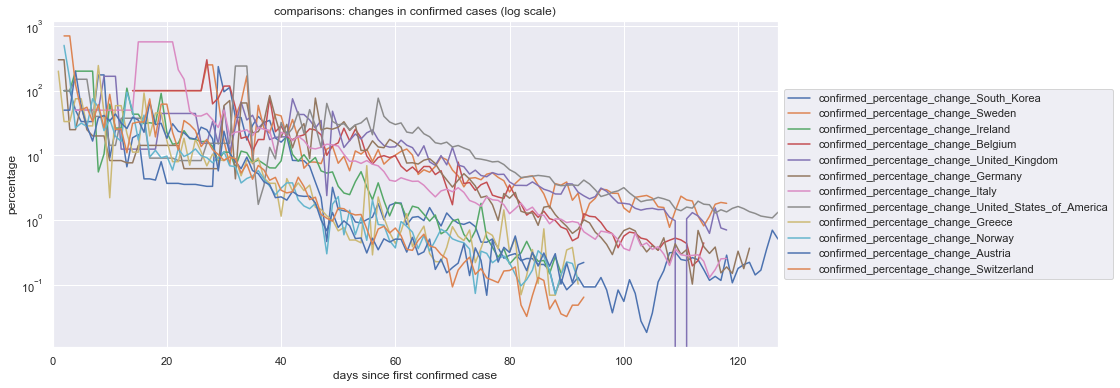

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
123                              0.375940                              NaN   
124                              0.749064                              NaN   
125                                   NaN                              NaN   
126                                   NaN                              NaN   
127                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
123                               NaN                               NaN   
124                               NaN                               NaN   
125                               NaN                               NaN   
126                               NaN                               NaN   
127                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
123                                      NaN   
124                                      NaN   
125                                      NaN   
126                                      NaN   
127                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
123                               NaN                             NaN   
124                               NaN                             NaN   
125                               NaN                             NaN   
126                               NaN                             NaN   
127                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
123                                           0.651999   
124                                           0.511671   
125                                           0.705566   
126                                           1.521555   
127                                           1.194021   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
123                              NaN                              NaN   
124                              NaN                              NaN   
125                              NaN                              NaN   
126                              NaN                              NaN   
127                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
123                               NaN                                   NaN  
124                               NaN                                   NaN  
125                               NaN                                   NaN  
126                               NaN                                   NaN  
127                               NaN                                   NaN

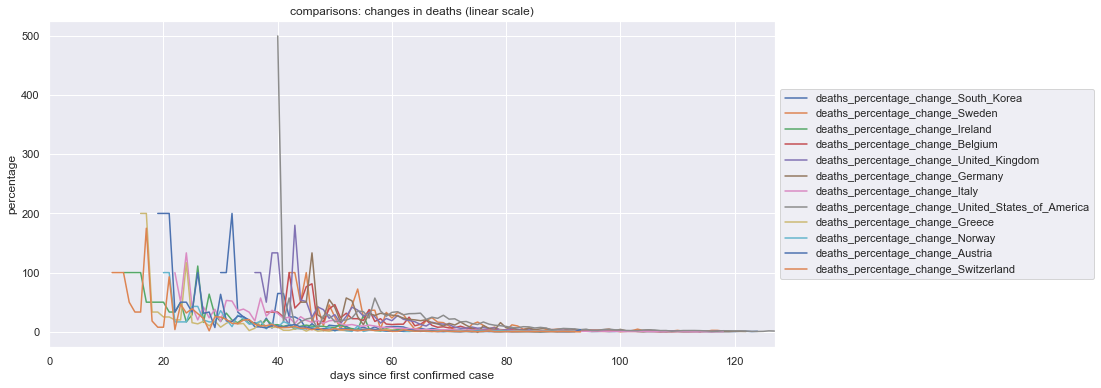

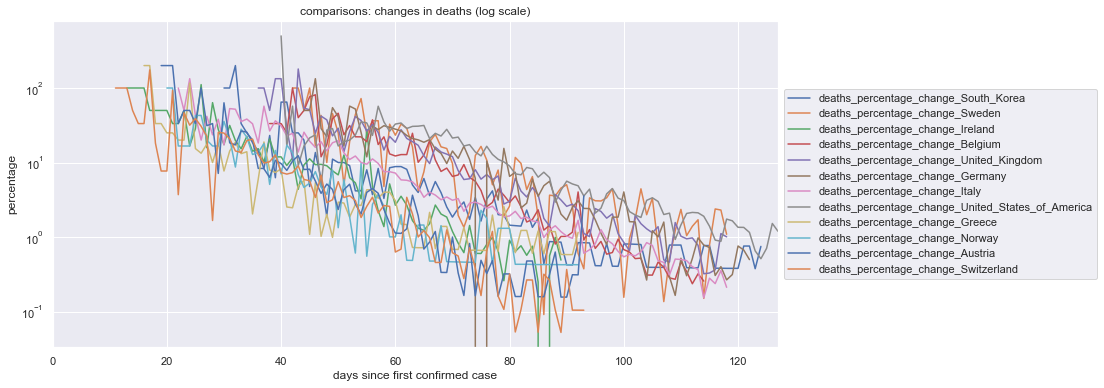

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
123                              NaN                               NaN   
124                              NaN                               NaN   
125                              NaN                               NaN   
126                              NaN                               NaN   
127                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
123                               NaN   
124                               NaN   
125                               NaN   
126                               NaN   
127                               NaN   

     deaths_percentage_change_United_Kingdom  \
123                                      NaN   
124                                      NaN   
125                                      NaN   
126                                      NaN   
127                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
123                               NaN                             NaN   
124                               NaN                             NaN   
125                               NaN                             NaN   
126                               NaN                             NaN   
127                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
123                              NaN                              NaN   
124                              NaN                              NaN   
125                              NaN                              NaN   
126                              NaN                              NaN   
127                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
123                               NaN                                   NaN  
124                               NaN                                   NaN  
125                               NaN                                   NaN  
126                               NaN                                   NaN  
127                               NaN                                   NaN

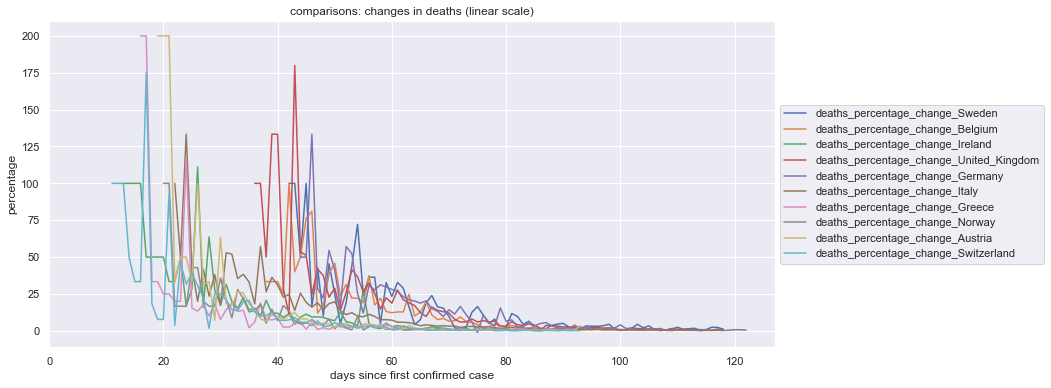

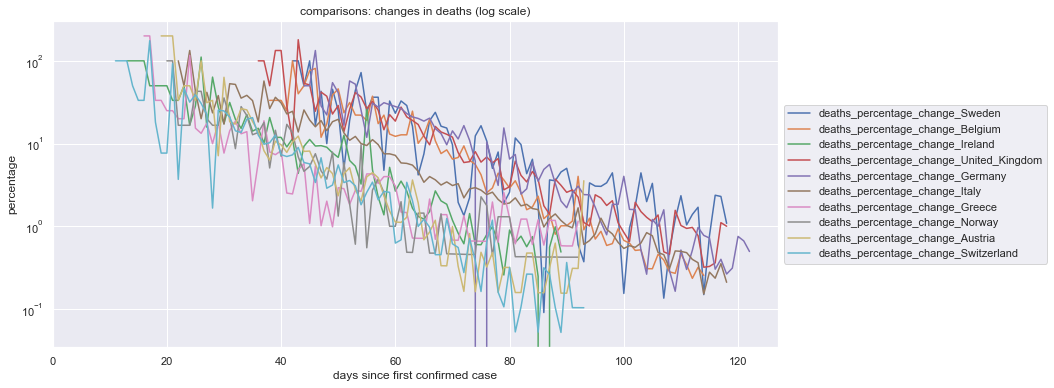

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');